In [900]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname('KOH1'), 'src'))
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from IPython.display import display
pd.set_option('display.width', 1000)           
pd.set_option('display.max_columns', None)     
pd.set_option('display.max_colwidth', None)

import kohonen_network
from kohonen_network import KohonenNetwork
import visualizations
import parameters_simulations
importlib.reload(kohonen_network)
importlib.reload(parameters_simulations)
importlib.reload(visualizations)
from parameters_simulations import *
from visualizations import *

import warnings
warnings.filterwarnings('ignore')


### hexagon dataset

2D data shape: (600, 2)


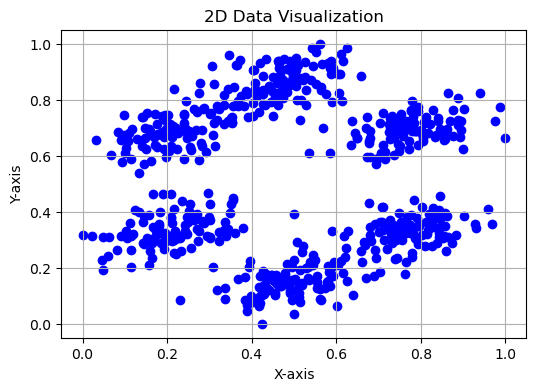

In [765]:
data_hex = pd.read_csv('./data/hexagon.csv')
data_hex_xy=data_hex[['x', 'y']].to_numpy()
data_hez_c=data_hex[['c']].to_numpy()
print("2D data shape:", data_hex_xy.shape)
scaler = MinMaxScaler()
data_hex_xy = scaler.fit_transform(data_hex_xy)
visualize_2d_data(data_hex_xy)

#### sample kohonen network

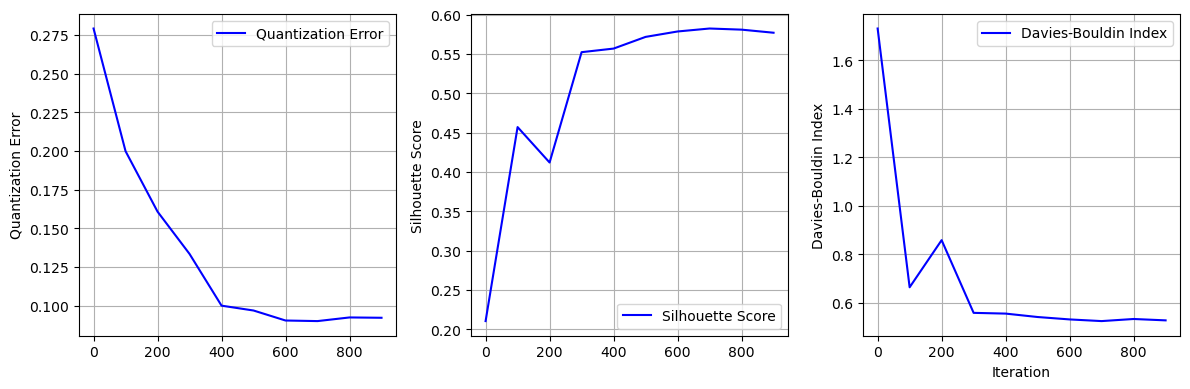

In [766]:
net_2d = KohonenNetwork(M=2, N=3, input_dim=2, neighbourhood_function='gaussian')
net_2d.fit(data_hex_xy, number_of_iterations=1000, lambda_=500, sigma_t=1.0, s=1.0, plot_eval_metrics=True, eval_every=100)

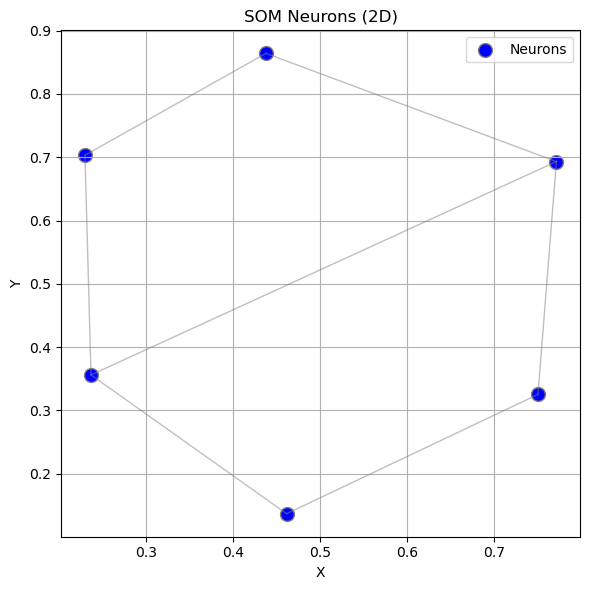

In [767]:
net_2d.visualize_neurons_2d()

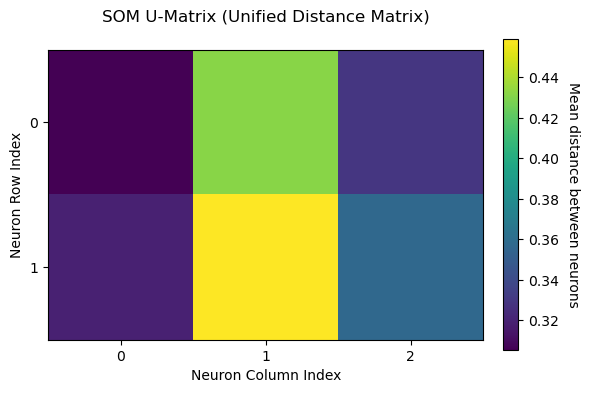

In [768]:
net_2d.plot_umatrix()

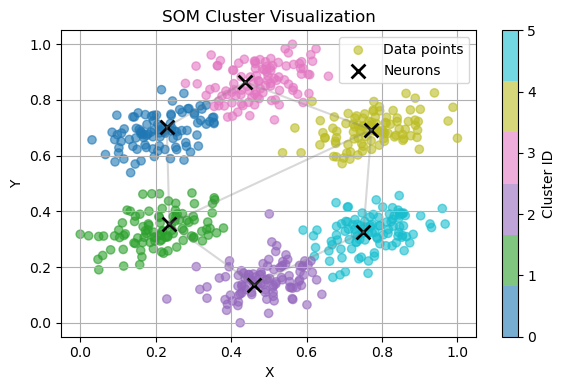

In [769]:
net_2d.visualize_clusters(data_hex_xy)

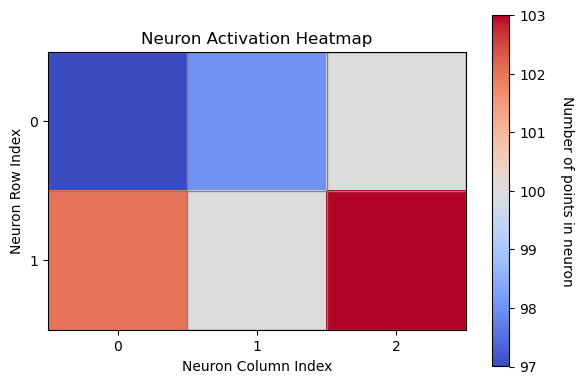

In [770]:
net_2d.visualize_heatmap(data=data_hex_xy, cmap="coolwarm")

In [771]:
metrics_df= net_2d.calculate_clustering_metrics(data_hex_xy, true_labels=data_hez_c)
display(metrics_df)

Silhouette Score  Davies-Bouldin Index  Quantization Error  Number of Clusters
0              0.58                  0.53                0.09                   6

In [772]:
class_dist = net_2d.class_distribution_in_neurons(data_hex_xy, data_hez_c)
print_class_distribution(class_dist)

                         CLASS DISTRIBUTION IN NEURONS                          
Neuron  Total Samples         Class Distribution       
(0,0)        97                  0:1(1.0%), 5:96(99.0%)
(0,1)        98                            4:98(100.0%)
(0,2)       100       2:1(1.0%), 3:97(97.0%), 4:2(2.0%)
(1,0)       102                  0:98(96.1%), 5:4(3.9%)
(1,1)       100                  0:1(1.0%), 1:99(99.0%)
(1,2)       103       1:1(1.0%), 2:99(96.1%), 3:3(2.9%)


In [773]:
class_to_neurons, neuron_stats = net_2d.get_neurons_defining_class(data_hex_xy, data_hez_c)
print_neuron_mapping(class_to_neurons, neuron_stats)

                NEURON CLASS MAPPING REPORT                 
Neuron  Dominant Class Purity Associated Classes
 (1,0)               0  96.1%             [0, 5]
 (1,1)               1  99.0%             [1, 0]
 (1,2)               2  96.1%          [1, 2, 3]
 (0,2)               3  97.0%          [2, 4, 3]
 (0,1)               4 100.0%                [4]
 (0,0)               5  99.0%             [0, 5]

              CLASS TO NEURON MAPPING SUMMARY               
------------------------------------------------------------
Class 1: 2 neurons → [(1, 1), (1, 2)]
Class 0: 3 neurons → [(0, 0), (1, 0), (1, 1)]
Class 2: 2 neurons → [(0, 2), (1, 2)]
Class 4: 2 neurons → [(0, 1), (0, 2)]
Class 3: 2 neurons → [(0, 2), (1, 2)]
Class 5: 2 neurons → [(0, 0), (1, 0)]


same thing larger grid

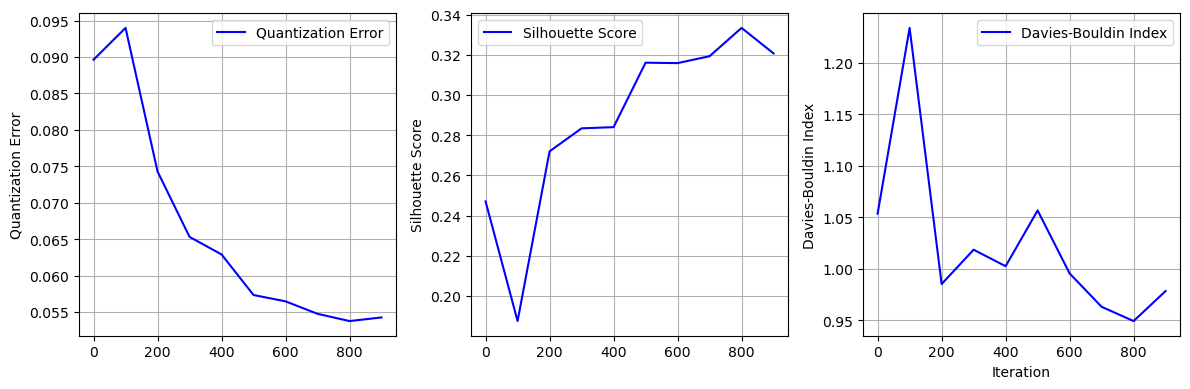

In [774]:
net_2d = KohonenNetwork(M=10, N=2, input_dim=2, neighbourhood_function='gaussian')
net_2d.fit(data_hex_xy, number_of_iterations=1000, lambda_=500, sigma_t=1.0, s=1.0, plot_eval_metrics=True, eval_every=100)

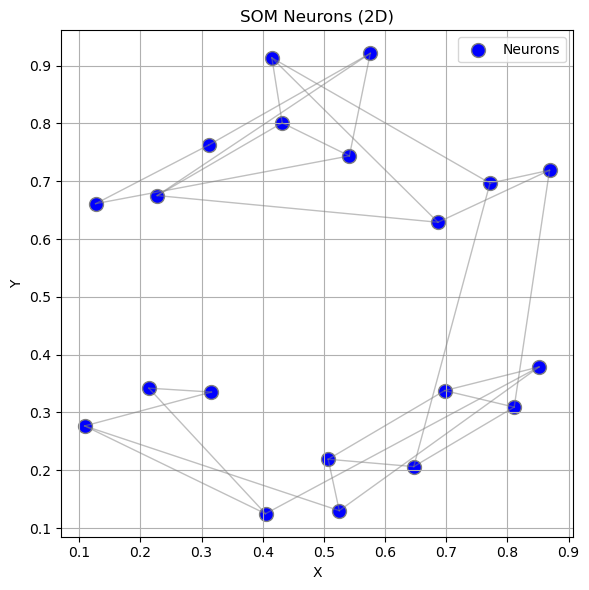

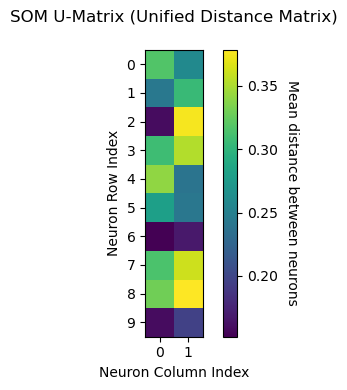

In [775]:
net_2d.visualize_neurons_2d()
net_2d.plot_umatrix()

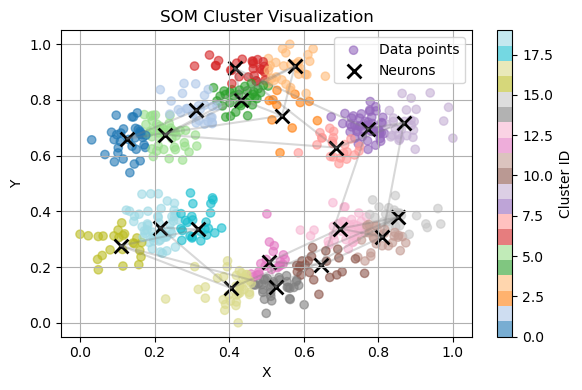

In [776]:
net_2d.visualize_clusters(data_hex_xy)

In [777]:
metrics_df= net_2d.calculate_clustering_metrics(data_hex_xy, true_labels=data_hez_c)
display(metrics_df)

Silhouette Score  Davies-Bouldin Index  Quantization Error  Number of Clusters
0              0.33                  0.94                0.05                  20

In [778]:
class_dist = net_2d.class_distribution_in_neurons(data_hex_xy, data_hez_c)
print_class_distribution(class_dist)

                         CLASS DISTRIBUTION IN NEURONS                          
Neuron  Total Samples    Class Distribution  
(0,0)        33                  5:33(100.0%)
(0,1)        27       0:3(11.1%), 5:24(88.9%)
(1,0)        11        0:8(72.7%), 1:3(27.3%)
(1,1)        31                  0:31(100.0%)
(2,0)        32                  0:32(100.0%)
(2,1)        43                  5:43(100.0%)
(3,0)        26                  0:26(100.0%)
(3,1)        22                  1:22(100.0%)
(4,0)        47                  1:47(100.0%)
(4,1)        27                  1:27(100.0%)
(5,0)        22       2:8(36.4%), 3:14(63.6%)
(5,1)        29                  2:29(100.0%)
(6,0)        20        3:19(95.0%), 4:1(5.0%)
(6,1)        35                  2:35(100.0%)
(7,0)        32        2:1(3.1%), 3:31(96.9%)
(7,1)        28        1:1(3.6%), 2:27(96.4%)
(8,0)        23                  4:23(100.0%)
(8,1)        37        3:36(97.3%), 4:1(2.7%)
(9,0)        25                  4:25(100.0%)

In [779]:
class_to_neurons, neuron_stats= net_2d.get_neurons_defining_class(data_hex_xy, data_hez_c)
print_neuron_mapping(class_to_neurons, neuron_stats)

                NEURON CLASS MAPPING REPORT                 
Neuron  Dominant Class Purity Associated Classes
 (1,0)               0  72.7%             [1, 0]
 (1,1)               0 100.0%                [0]
 (2,0)               0 100.0%                [0]
 (3,0)               0 100.0%                [0]
 (3,1)               1 100.0%                [1]
 (4,0)               1 100.0%                [1]
 (4,1)               1 100.0%                [1]
 (7,1)               2  96.4%             [1, 2]
 (5,1)               2 100.0%                [2]
 (6,1)               2 100.0%                [2]
 (8,1)               3  97.3%             [4, 3]
 (7,0)               3  96.9%             [2, 3]
 (6,0)               3  95.0%             [4, 3]
 (5,0)               3  63.6%             [2, 3]
 (8,0)               4 100.0%                [4]
 (9,0)               4 100.0%                [4]
 (9,1)               4 100.0%                [4]
 (0,1)               5  88.9%             [0, 5]
 (0,0)  

grid 10x10 neurons

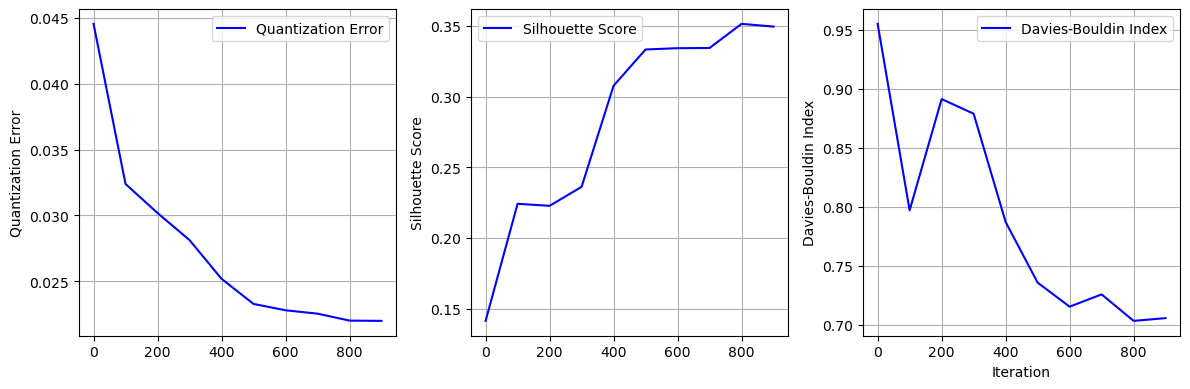

In [780]:
net_2d = KohonenNetwork(M=10, N=10, input_dim=2, neighbourhood_function='gaussian')
net_2d.fit(data_hex_xy, number_of_iterations=1000, lambda_=500, sigma_t=1.0, s=1.0, plot_eval_metrics=True, eval_every=100)

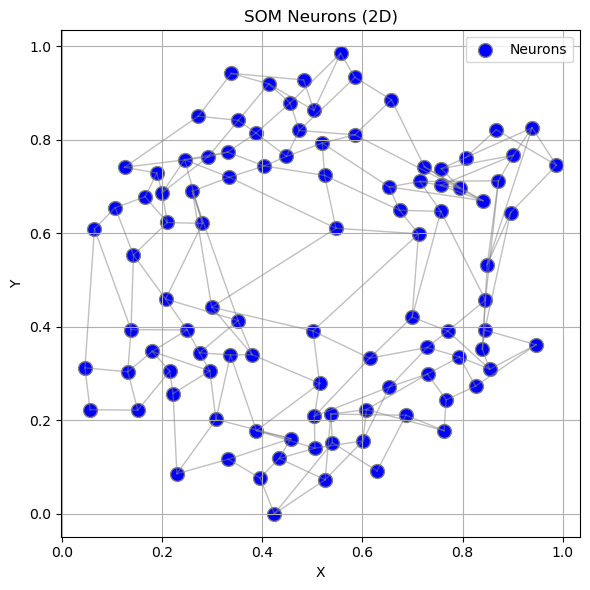

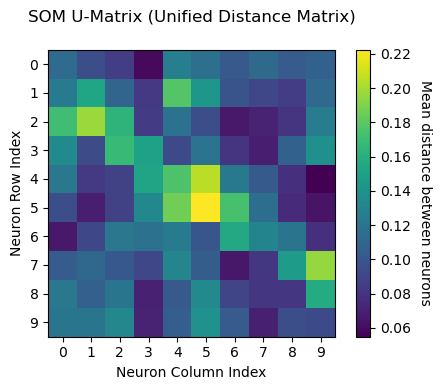

In [781]:
net_2d.visualize_neurons_2d()
net_2d.plot_umatrix()

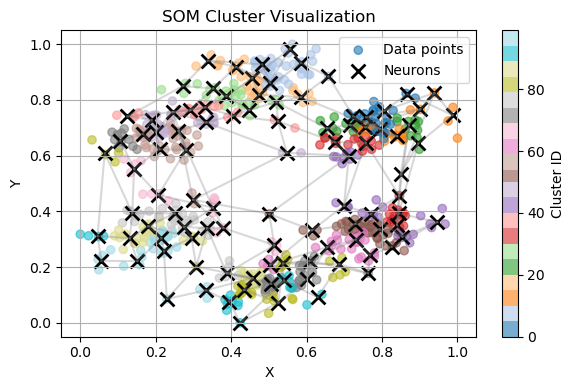

In [782]:
net_2d.visualize_clusters(data_hex_xy)

In [783]:
metrics_df= net_2d.calculate_clustering_metrics(data_hex_xy, true_labels=data_hez_c)
display(metrics_df)

Silhouette Score  Davies-Bouldin Index  Quantization Error  Number of Clusters
0              0.36                   0.7                0.02                  99

#### trying different number of iterations

In [787]:
no_iterations=[100, 200, 500, 1000, 2000, 10000]
no_iterations_experiments=try_different_number_of_iteration(data=data_hex_xy, M=2, N=3, input_dim=2, 
                                                            neighbourhood_function='gaussian', 
                                                            number_of_iterations_values=no_iterations, 
                                                            lambda_=500, sigma_t=1.0, s=1.0)

Fit with number of iterations: 100
Fit with number of iterations: 200
Fit with number of iterations: 500
Fit with number of iterations: 1000
Fit with number of iterations: 2000
Fit with number of iterations: 10000


In [ ]:
results_df = pd.DataFrame(no_iterations_experiments)
display_cols = ['number_of_iterations', 'num_clusters', 'quantization_error', 'silhouette_score', 'davies_bouldin_index']
print(results_df[display_cols].round(4))

   number_of_iterations  num_clusters  quantization_error  silhouette_score  davies_bouldin_index
0                   100             6              0.1930            0.4846                0.6513
1                   200             6              0.2014            0.4206                0.8927
2                   500             6              0.1069            0.5294                0.5678
3                  1000             6              0.0933            0.5769                0.5281
4                  2000             6              0.0868            0.5827                0.5288
5                 10000             6              0.0866            0.5832                0.5266
6                 50000             6              0.0866            0.5832                0.5266
7                100000             6              0.0866            0.5832                0.5266


number of iterations but with larger grid

In [789]:
no_iterations=[100, 200, 500, 1000, 2000, 10000]
no_iterations_experiments=try_different_number_of_iteration(data=data_hex_xy, M=10, N=2, input_dim=2, 
                                                            neighbourhood_function='gaussian', 
                                                            number_of_iterations_values=no_iterations, 
                                                            lambda_=500, sigma_t=1.0, s=1.0)

Fit with number of iterations: 100
Fit with number of iterations: 200
Fit with number of iterations: 500
Fit with number of iterations: 1000
Fit with number of iterations: 2000
Fit with number of iterations: 10000


In [790]:
results_df = pd.DataFrame(no_iterations_experiments)
display_cols = ['number_of_iterations', 'num_clusters', 'quantization_error', 'silhouette_score', 'davies_bouldin_index']
print(results_df[display_cols].round(4))

   number_of_iterations  num_clusters  quantization_error  silhouette_score  davies_bouldin_index
0                   100            20              0.0847            0.2171                1.1516
1                   200            20              0.0739            0.2773                1.1045
2                   500            20              0.0567            0.3114                0.9744
3                  1000            20              0.0528            0.3338                0.9057
4                  2000            20              0.0534            0.3375                0.9199
5                 10000            20              0.0523            0.3365                0.9313


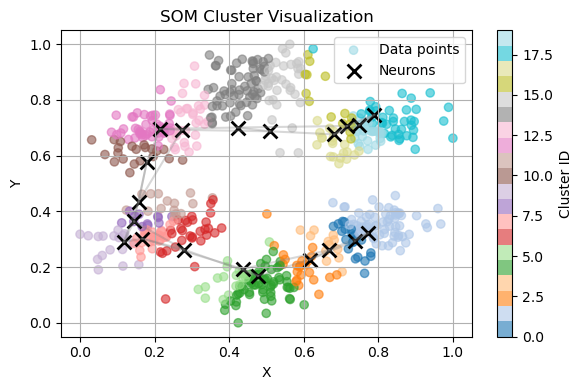

In [891]:
som_100 = next(item['som'] for item in no_iterations_experiments if item['number_of_iterations']==100)
som_100.visualize_clusters(data_hex_xy)

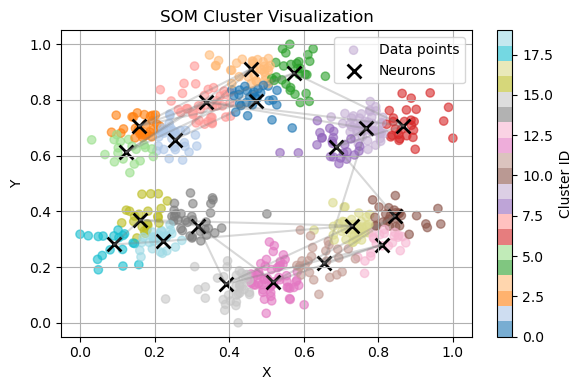

In [793]:
som_1000 = next(item['som'] for item in no_iterations_experiments if item['number_of_iterations']==1000)
som_1000.visualize_clusters(data_hex_xy)

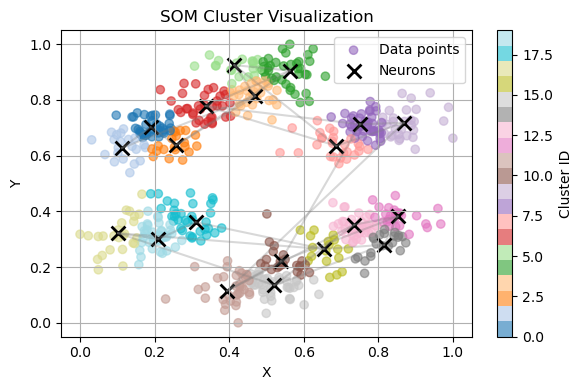

In [792]:
som_10000 = next(item['som'] for item in no_iterations_experiments if item['number_of_iterations']==10000)
som_10000.visualize_clusters(data_hex_xy)

#### trying different grid parameters

In [794]:
M_values=[2,5,10,25]
N_values=[2,5,10,25]
grid_experiments=try_different_grid_sizes(data=data_hex_xy, M_values=M_values, N_values=N_values, 
                                          input_dim=2, neighbourhood_function='gaussian', 
                                        number_of_iterations=1000, lambda_=500, sigma_t=1.0, s=1.0)

Fit with grid: 2x2, number of neurons in grid: 4
Fit with grid: 2x5, number of neurons in grid: 10
Fit with grid: 2x10, number of neurons in grid: 20
Fit with grid: 2x25, number of neurons in grid: 50
Fit with grid: 5x2, number of neurons in grid: 10
Fit with grid: 5x5, number of neurons in grid: 25
Fit with grid: 5x10, number of neurons in grid: 50
Fit with grid: 5x25, number of neurons in grid: 125
Fit with grid: 10x2, number of neurons in grid: 20
Fit with grid: 10x5, number of neurons in grid: 50
Fit with grid: 10x10, number of neurons in grid: 100
Fit with grid: 10x25, number of neurons in grid: 250
Fit with grid: 25x2, number of neurons in grid: 50
Fit with grid: 25x5, number of neurons in grid: 125
Fit with grid: 25x10, number of neurons in grid: 250
Fit with grid: 25x25, number of neurons in grid: 625


In [795]:
results_df = pd.DataFrame(grid_experiments)
display_cols = ['M', 'N', 'number_of_neurons', 'num_clusters', 'quantization_error', 'silhouette_score', 'davies_bouldin_index']
sorted= results_df[display_cols].sort_values('number_of_neurons').reset_index(drop=True).round(4)
print(sorted)

     M   N  number_of_neurons  num_clusters  quantization_error  silhouette_score  davies_bouldin_index
0    2   2                  4             4              0.1492            0.4753                0.6779
1    2   5                 10            10              0.0713            0.4337                0.8346
2    5   2                 10            10              0.0750            0.4439                0.8659
3    2  10                 20            20              0.0536            0.3425                0.9016
4   10   2                 20            20              0.0540            0.3277                0.9637
5    5   5                 25            25              0.0486            0.3220                0.9013
6    2  25                 50            50              0.0340            0.3373                0.8087
7    5  10                 50            50              0.0338            0.3384                0.8280
8   10   5                 50            50              0.0340 

More neurons in grid → smaller quantization error

Silhouette score decreases with larger grids → expected behavior when knowing true labels - small grids oversimplify, large grids overpartition

Total neuron count is more important than grid shape

Number of detected clusters is always less than neuron count, some neurons remain inactive or serve as decision boundaries


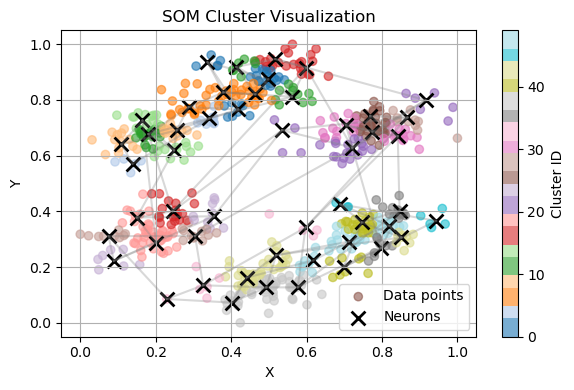

In [796]:
som_10_10 = next(item['som'] for item in grid_experiments if item['M'] == 10 and item['N']==5)
som_10_10.visualize_clusters(data_hex_xy)

#### trying different lamda_ values

Fit with lambda value: 1
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected


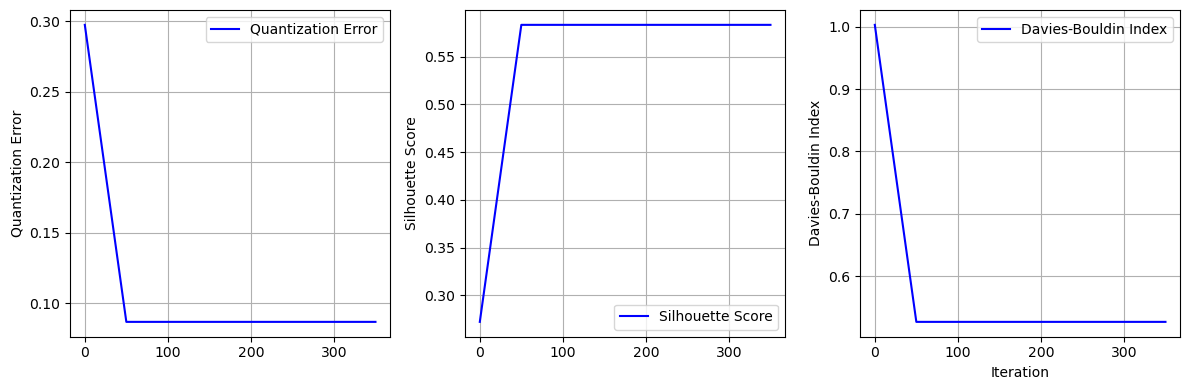

Only 1 cluster detected
Fit with lambda value: 10


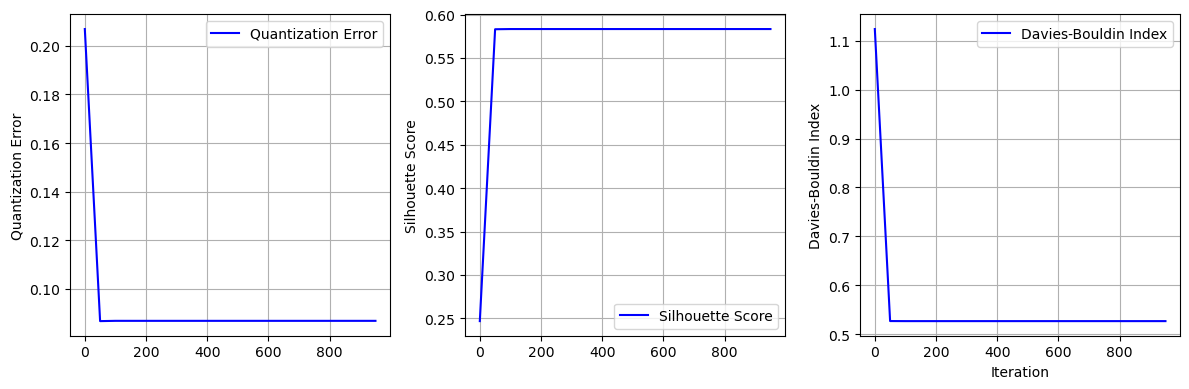

Fit with lambda value: 100


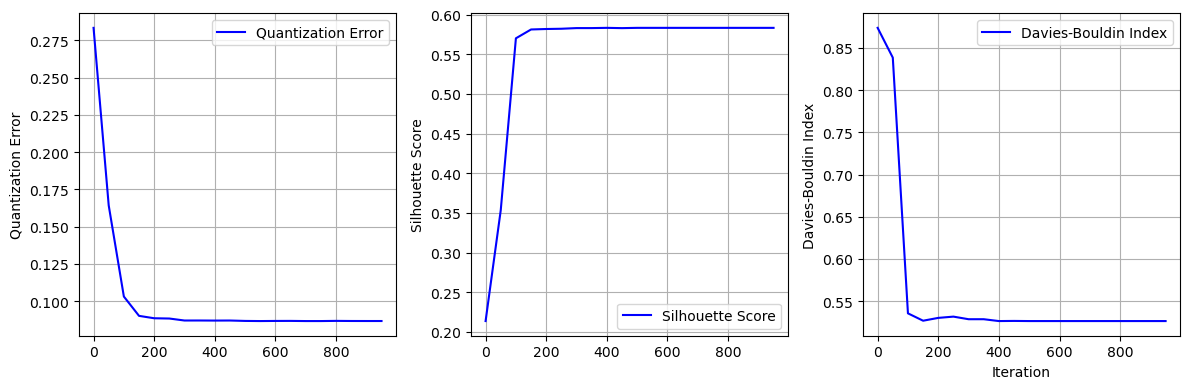

Fit with lambda value: 500


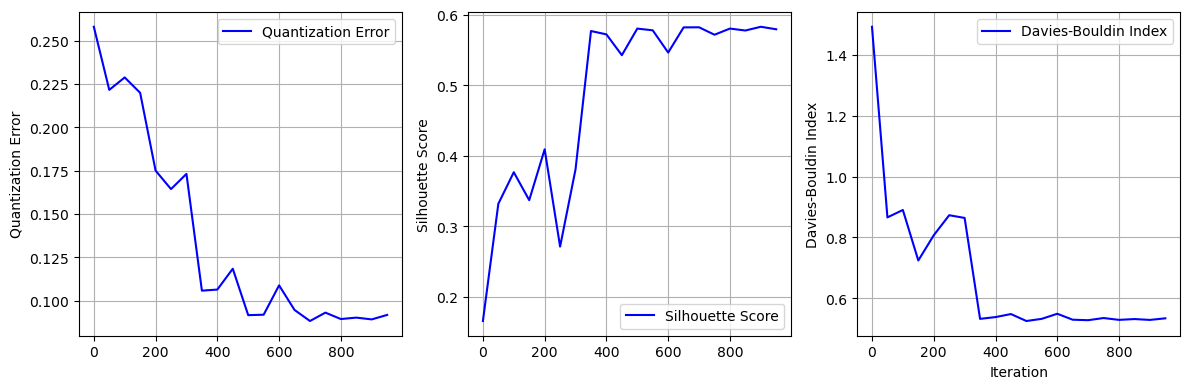

Fit with lambda value: 1000


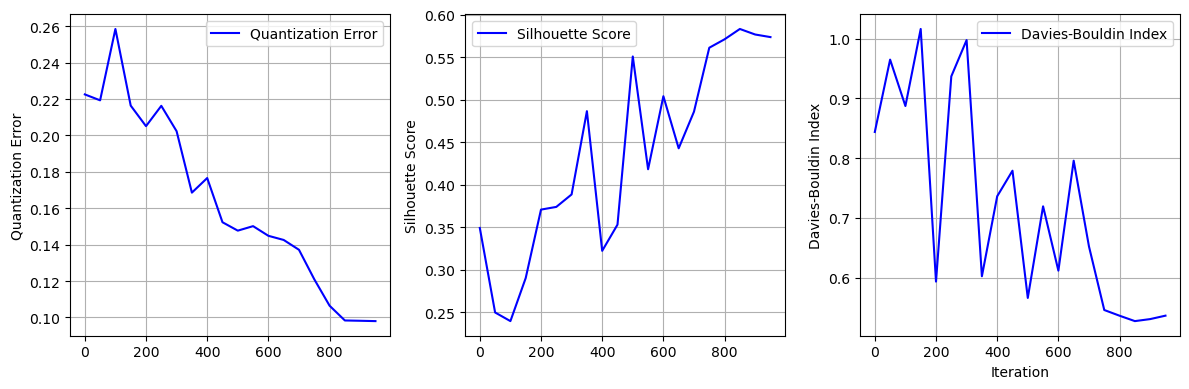

Fit with lambda value: 2000


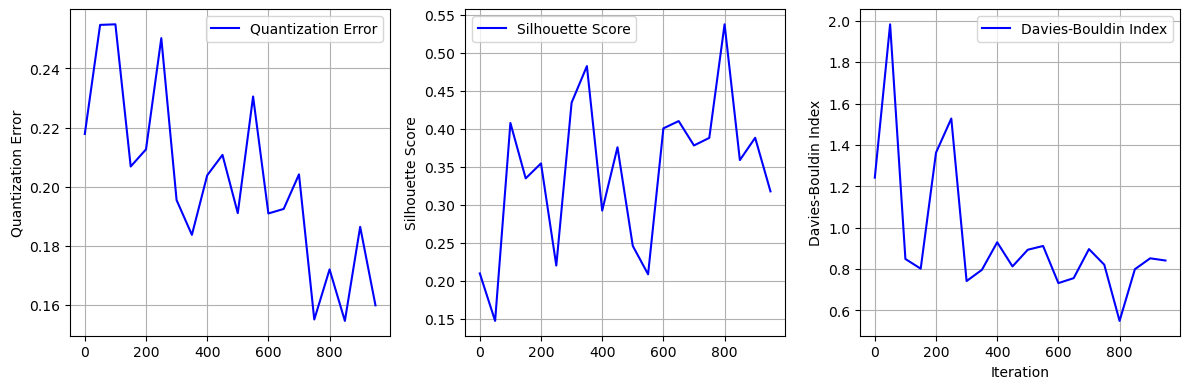

In [797]:
lambda_values=[1,10,100, 500, 1000, 2000]
lamda_values_experiments=try_different_lamda_values(data=data_hex_xy, M=2, N=3, input_dim=2, neighbourhood_function='gaussian',
                                        number_of_iterations=1000, lambda_values=lambda_values, sigma_t=1.0, s=1.0, eval_every=50)

In [798]:
results_df = pd.DataFrame(lamda_values_experiments)
display_cols = ['lambda','quantization_error', 'silhouette_score', 'davies_bouldin_index', 'num_clusters' ]
print(results_df[display_cols].round(4))

   lambda  quantization_error  silhouette_score  davies_bouldin_index  num_clusters
0       1                 NaN               NaN                   NaN             1
1      10              0.0868            0.5832                0.5266             6
2     100              0.0867            0.5832                0.5266             6
3     500              0.0922            0.5810                0.5306             6
4    1000              0.1019            0.5756                0.5269             6
5    2000              0.1439            0.4619                0.7362             6


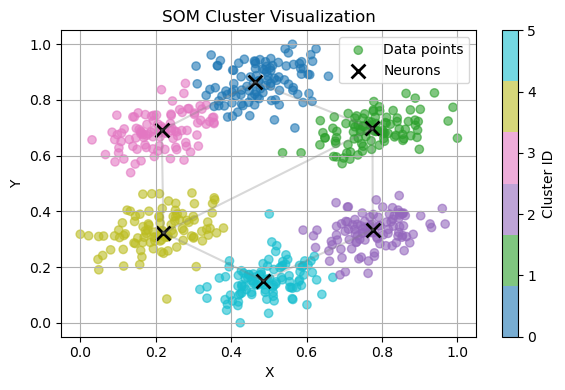

In [819]:
som_lambda_100 = next(item['som'] for item in lamda_values_experiments if item['lambda'] == 100)
som_lambda_100.visualize_clusters(data_hex_xy)

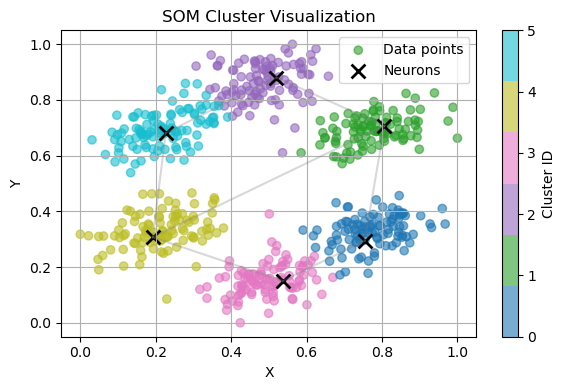

In [799]:
som_lambda_500 = next(item['som'] for item in lamda_values_experiments if item['lambda'] == 500)
som_lambda_500.visualize_clusters(data_hex_xy)

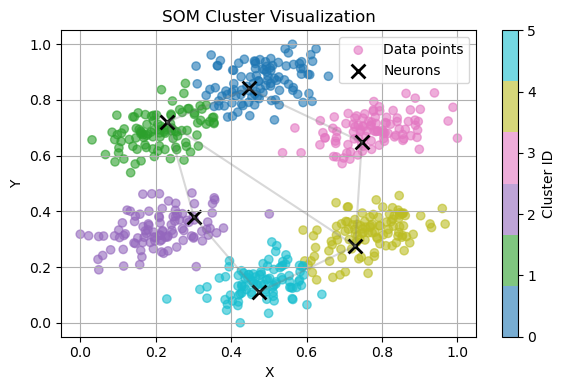

In [820]:
som_lambda_1000 = next(item['som'] for item in lamda_values_experiments if item['lambda'] == 1000)
som_lambda_1000.visualize_clusters(data_hex_xy)

same thing different (larger) grid

Fit with lambda value: 1
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected


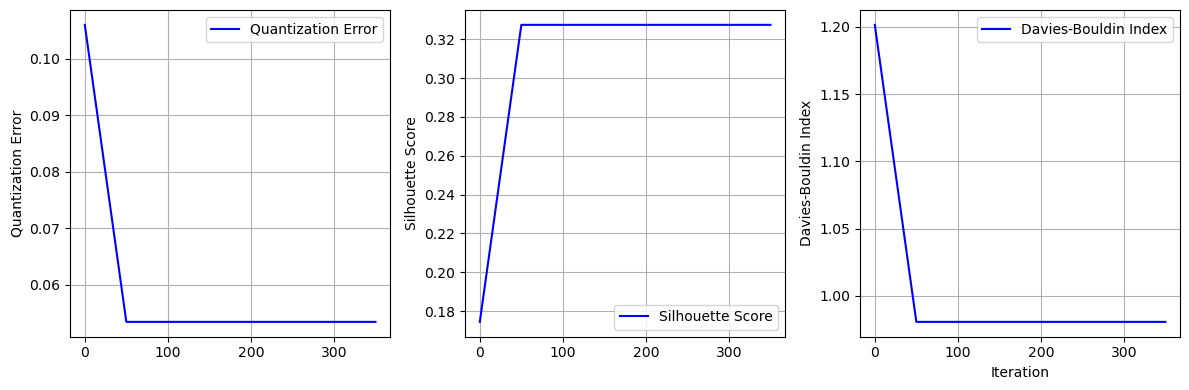

Only 1 cluster detected
Fit with lambda value: 10


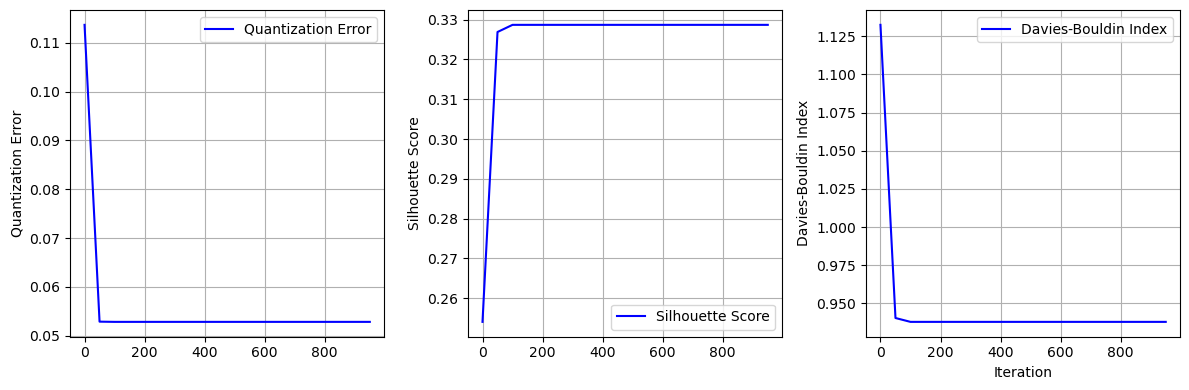

Fit with lambda value: 100


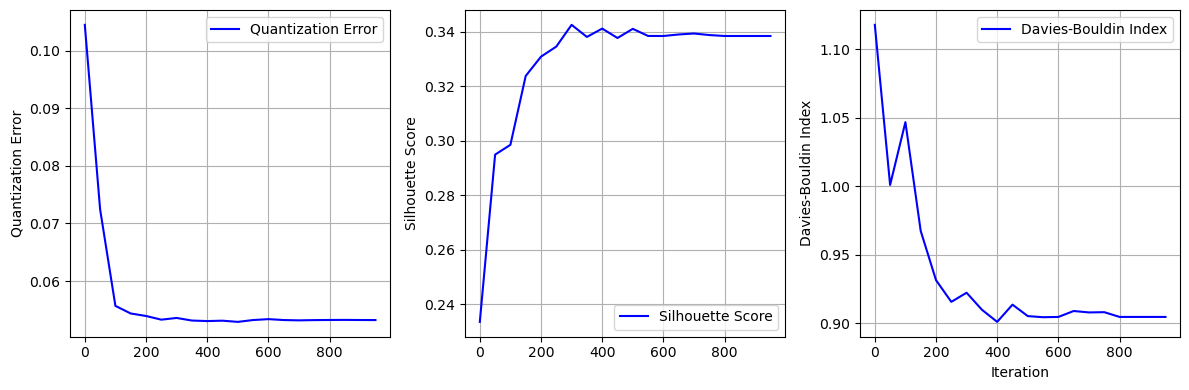

Fit with lambda value: 500


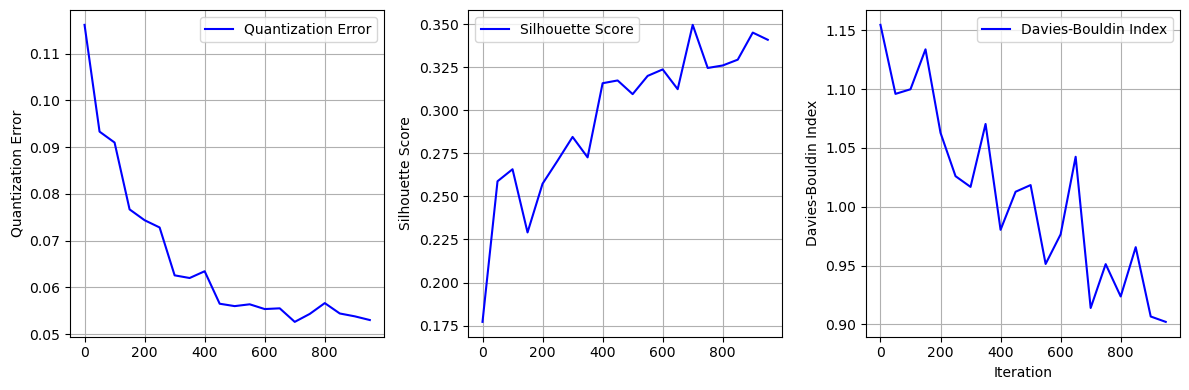

Fit with lambda value: 1000


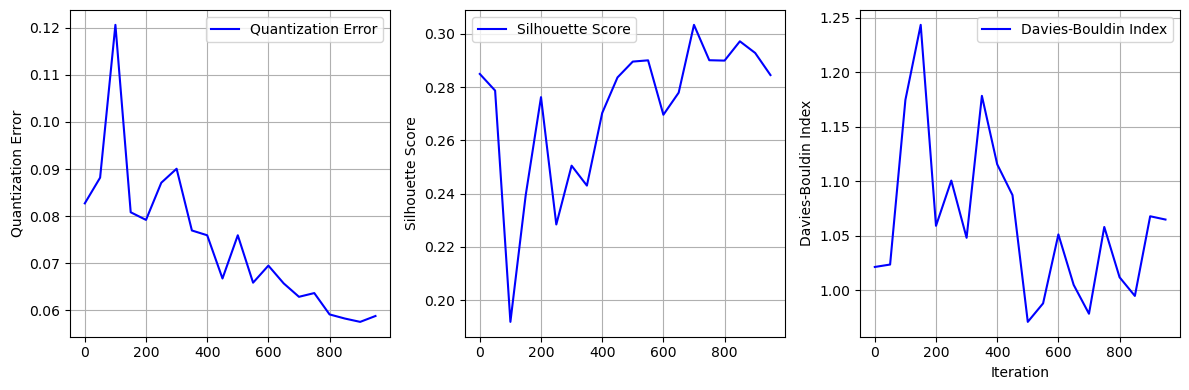

Fit with lambda value: 2000


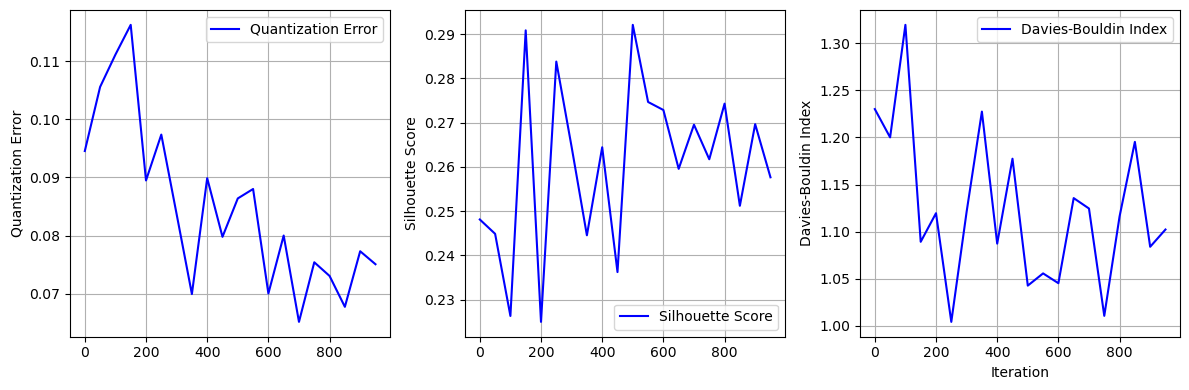

In [801]:
lambda_values=[1,10,100, 500, 1000, 2000]
lamda_values_larger_grid_experiments=try_different_lamda_values(data=data_hex_xy, M=10, N=2, input_dim=2, neighbourhood_function='gaussian',
                                        number_of_iterations=1000, lambda_values=lambda_values, sigma_t=1.0, s=1.0, eval_every=50)

In [802]:
results_df = pd.DataFrame(lamda_values_larger_grid_experiments)
display_cols = ['lambda','quantization_error', 'silhouette_score', 'davies_bouldin_index', 'num_clusters' ]
print(results_df[display_cols].round(4))

   lambda  quantization_error  silhouette_score  davies_bouldin_index  num_clusters
0       1                 NaN               NaN                   NaN             1
1      10              0.0528            0.3287                0.9379            20
2     100              0.0532            0.3384                0.9045            20
3     500              0.0536            0.3185                0.9458            20
4    1000              0.0563            0.3126                1.0097            20
5    2000              0.0679            0.2903                1.0470            20


results: 

Higher λ = slower decay (longer adaptation)

Lower λ = faster decay (quick convergence)

still no improvment inlarger grid -> +- 20 clusters detected

#### trying different s values

In [906]:
s_values_experiments=try_different_s_values(data=data_hex_xy, M=2, N=3, input_dim=2, neighbourhood_function='gaussian',
                                        number_of_iterations=1000, lambda_=500, sigma_t=1.0)

Fit with s value: 0.1
Fit with s value: 0.5
Fit with s value: 1.0
Fit with s value: 2.0
Fit with s value: 5.0
Fit with s value: 10


In [907]:
results_df = pd.DataFrame(s_values_experiments)
display_cols = ['s','quantization_error', 'silhouette_score', 'davies_bouldin_index', 'num_clusters' ]
print(results_df[display_cols].round(4))

      s  quantization_error  silhouette_score  davies_bouldin_index  num_clusters
0   0.1              0.2634            0.4031                0.7260             6
1   0.5              0.0916            0.5818                0.5303             6
2   1.0              0.0906            0.5800                0.5276             6
3   2.0              0.0901            0.5829                0.5288             6
4   5.0              0.0888            0.5817                0.5284             6
5  10.0              0.0885            0.5813                0.5300             6


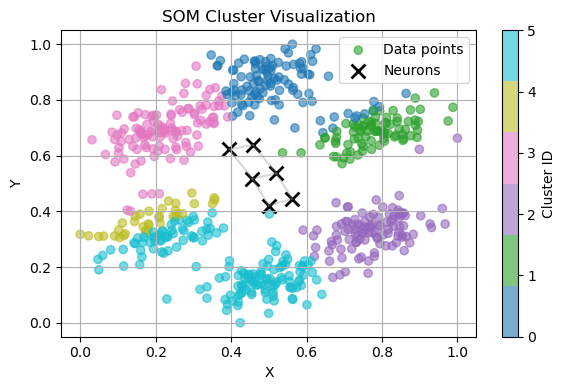

In [908]:
som_s_01 = next(item['som'] for item in s_values_experiments if item['s'] == 0.1)
som_s_01.visualize_clusters(data_hex_xy)

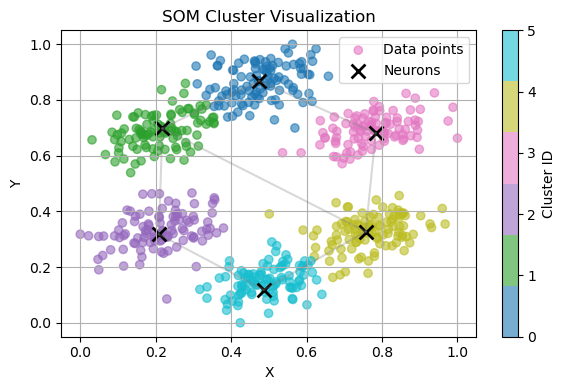

In [895]:
som_s_1 = next(item['som'] for item in s_values_experiments if item['s'] == 1.0)
som_s_1.visualize_clusters(data_hex_xy)

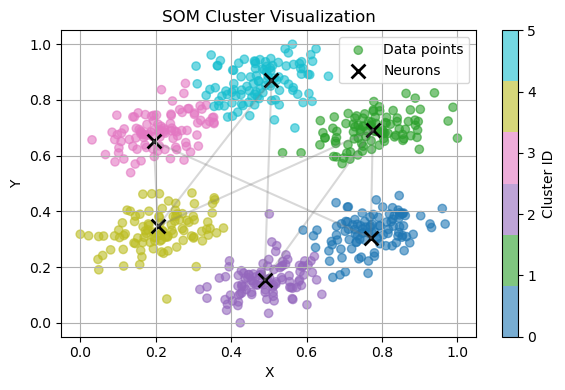

In [896]:
som_s_10 = next(item['som'] for item in s_values_experiments if item['s'] == 10.0)
som_s_10.visualize_clusters(data_hex_xy)

larger grid

In [901]:
s_values_experiments_larger_grid=try_different_s_values(data=data_hex_xy, M=10, N=10, input_dim=2, neighbourhood_function='gaussian',
                                        number_of_iterations=100, lambda_=10, sigma_t=1.0)

Fit with s value: 0.1
Fit with s value: 0.5
Fit with s value: 1.0
Fit with s value: 2.0
Fit with s value: 5.0
Fit with s value: 10


In [902]:
results_df = pd.DataFrame(s_values_experiments)
display_cols = ['s','quantization_error', 'silhouette_score', 'davies_bouldin_index', 'num_clusters' ]
print(results_df[display_cols].round(4))

      s  quantization_error  silhouette_score  davies_bouldin_index  num_clusters
0   0.1              0.2611            0.2697                0.8688             6
1   0.5              0.0901            0.5791                0.5304             6
2   1.0              0.0881            0.5819                0.5241             6
3   2.0              0.0894            0.5810                0.5278             6
4   5.0              0.0894            0.5828                0.5263             6
5  10.0              0.0893            0.5828                0.5265             6


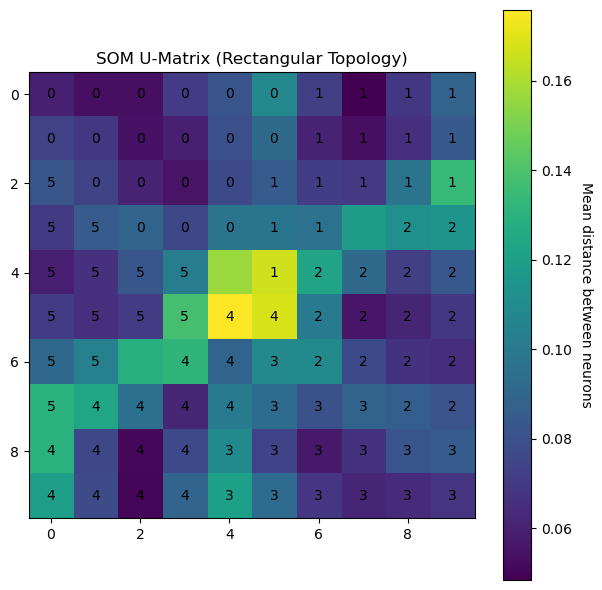

In [903]:
som_s_01 = next(item['som'] for item in s_values_experiments_larger_grid if item['s'] == 0.1)
som_s_01.plot_umatrix(data_hex_xy, data_hez_c)

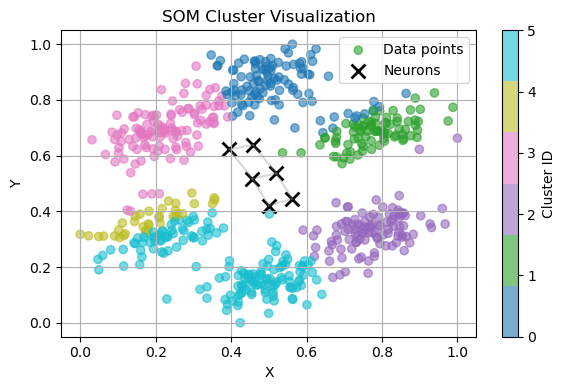

In [911]:
som_s_01.visualize_clusters(data_hex_xy)

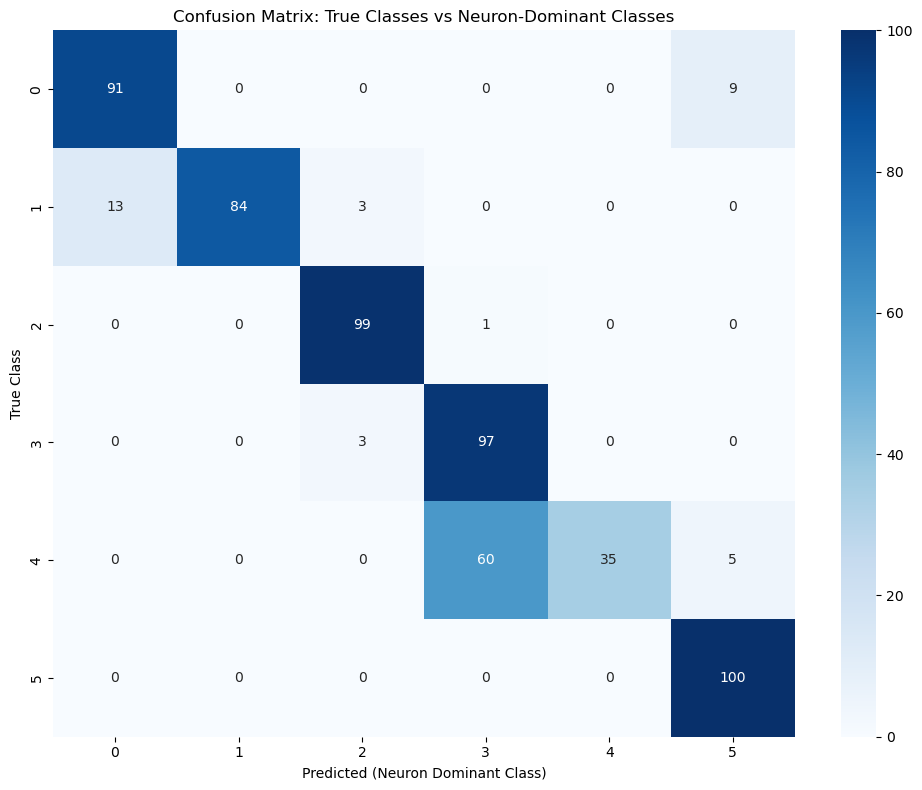

In [914]:
som_s_01.plot_confusion_matrix(data_hex_xy, data_hez_c)

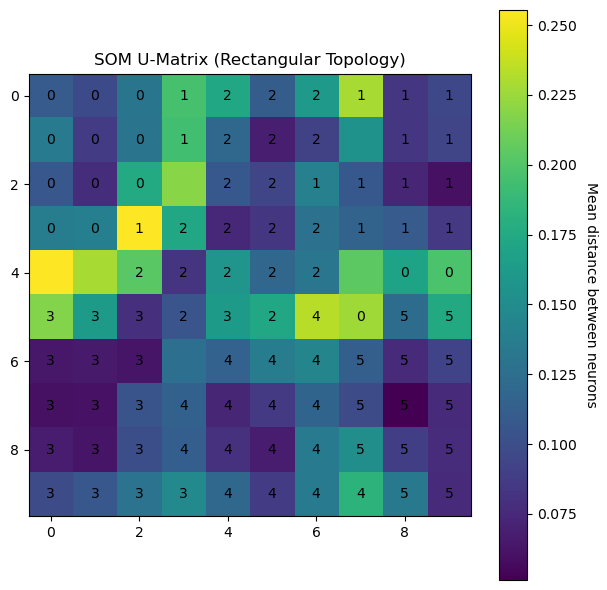

In [904]:
som_s_1 = next(item['som'] for item in s_values_experiments_larger_grid if item['s'] == 1.0)
som_s_1.plot_umatrix(data_hex_xy, data_hez_c)

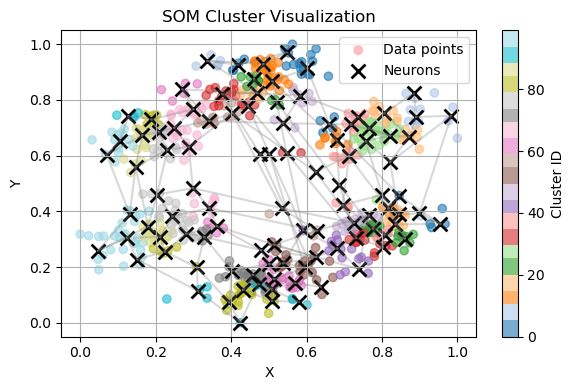

In [910]:
som_s_1.visualize_clusters(data_hex_xy)

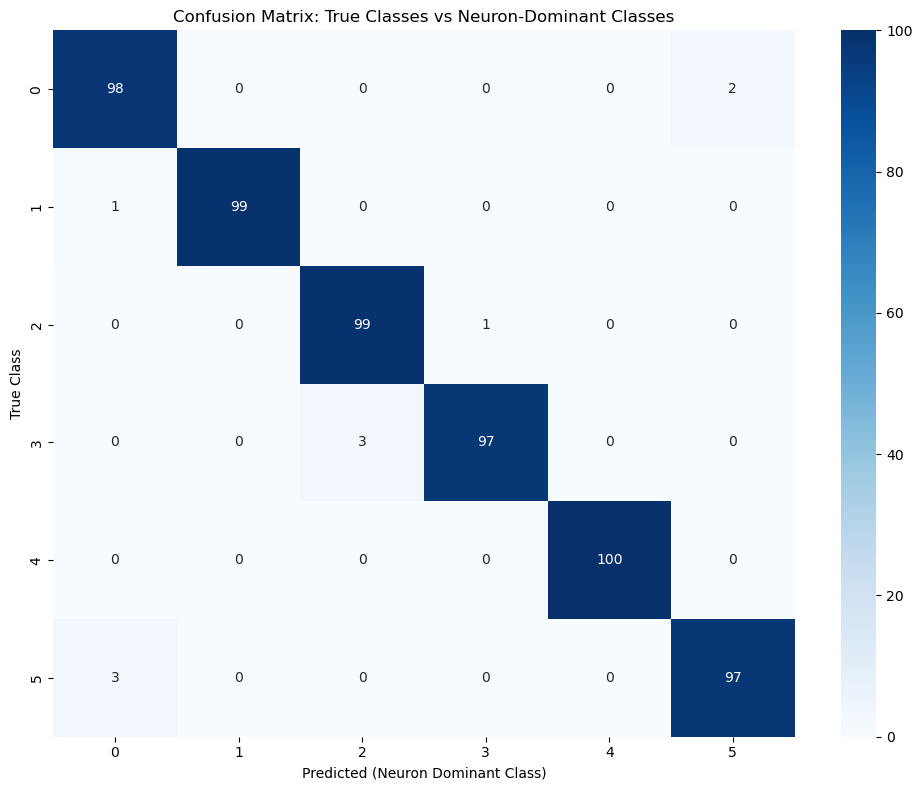

In [913]:
som_s_1.plot_confusion_matrix(data_hex_xy, data_hez_c)

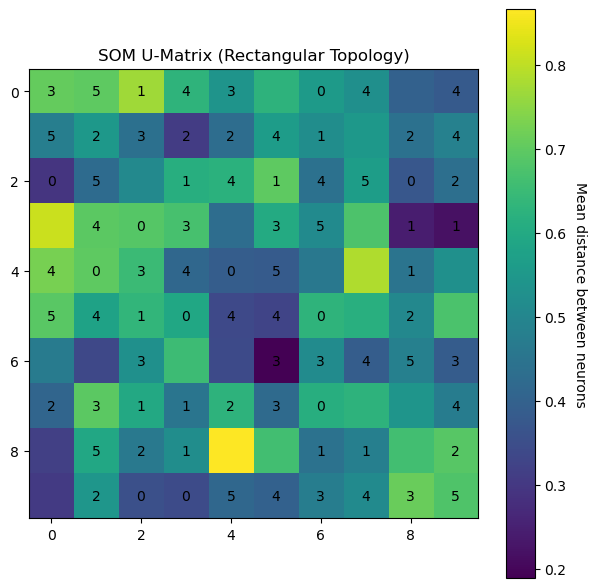

In [905]:
som_s_10 = next(item['som'] for item in s_values_experiments_larger_grid if item['s'] == 10)
som_s_10.plot_umatrix(data_hex_xy, data_hez_c)

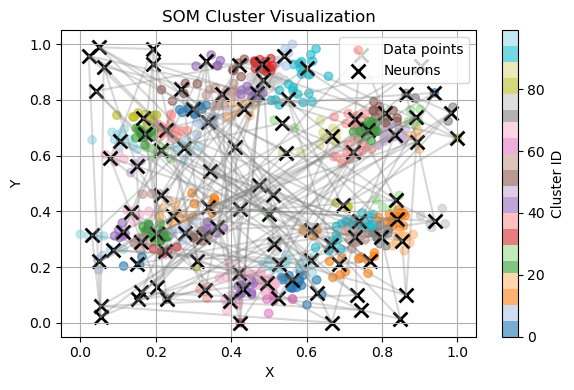

In [909]:
som_s_10.visualize_clusters(data_hex_xy)

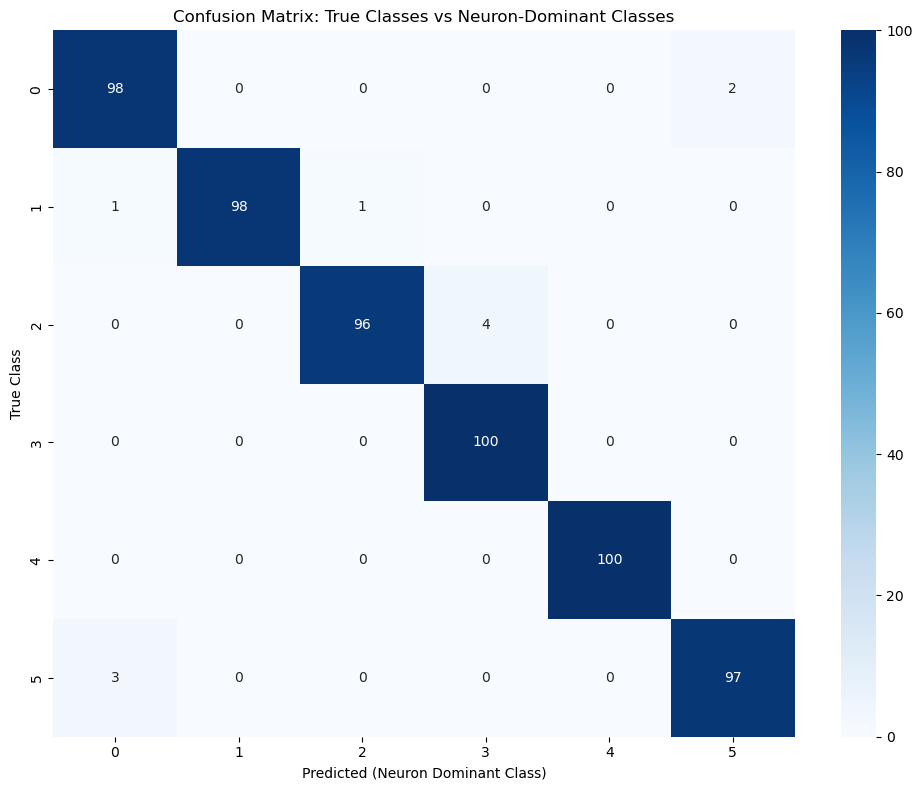

In [912]:
som_s_10.plot_confusion_matrix(data_hex_xy, data_hez_c)

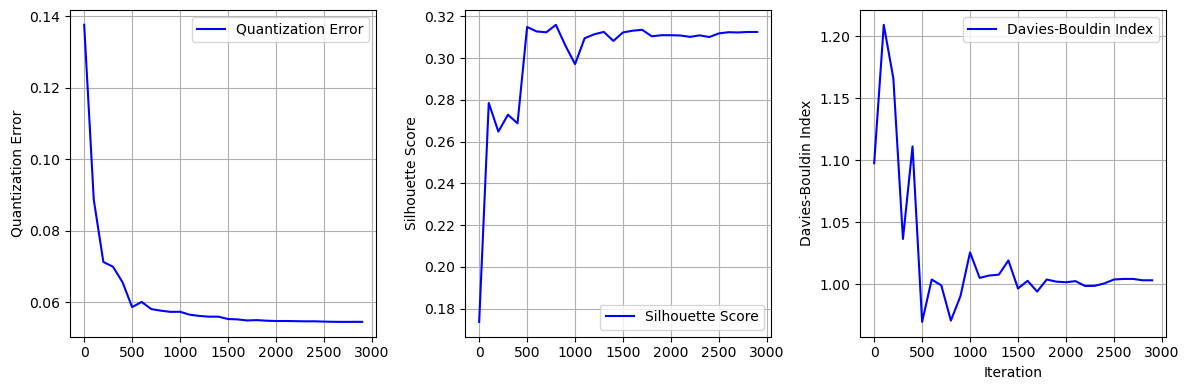

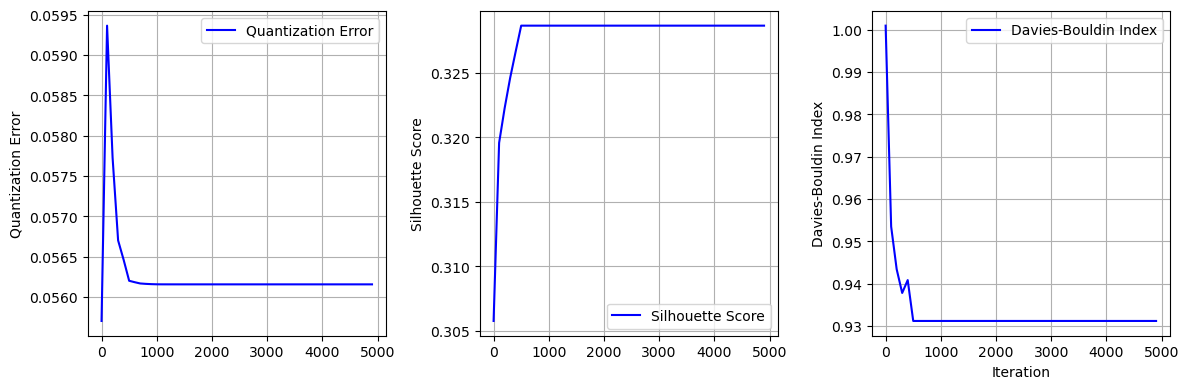

In [374]:
#first looking for global characteritics
#then searching in local neighbourhood
som_s01 = KohonenNetwork(M=10, N=2, input_dim=2, neighbourhood_function='gaussian')
som_s01.fit(data_hex_xy, number_of_iterations=3000, lambda_=500, sigma_t=1.0, s=1.0, plot_eval_metrics=True, eval_every=100)
som_s01.fit(data_hex_xy, number_of_iterations=5000, lambda_=100, sigma_t=0.1, s=0.5, plot_eval_metrics=True, eval_every=100, initialize_weights=False)

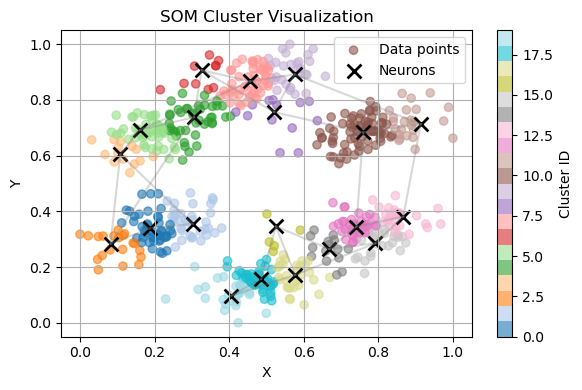

In [375]:
som_s01.visualize_clusters(data_hex_xy)

In [376]:
display(som_s01.calculate_clustering_metrics(data_hex_xy, true_labels=data_hez_c))

Silhouette Score  Davies-Bouldin Index  Quantization Error  Number of Clusters
0              0.33                  0.93                0.06                  20

#### trying different neighbourhood functions

In [821]:
neighbourhood_functions=try_neighbourhood_functions(data=data_hex_xy, M=2, N=3, input_dim=2, 
                                        number_of_iterations=1000, lambda_=500, sigma_t=1.0, s=1.0)

Only 1 cluster detected
Only 1 cluster detected


In [822]:
results_df = pd.DataFrame(neighbourhood_functions)
display_cols = ['neighbourhood_function','quantization_error', 'silhouette_score', 'davies_bouldin_index', 'num_clusters' ]
print(results_df[display_cols].round(4))

  neighbourhood_function  quantization_error  silhouette_score  davies_bouldin_index  num_clusters
0               gaussian              0.0924            0.5741                 0.531             6
1            mexican_hat              0.3514               NaN                   NaN             1


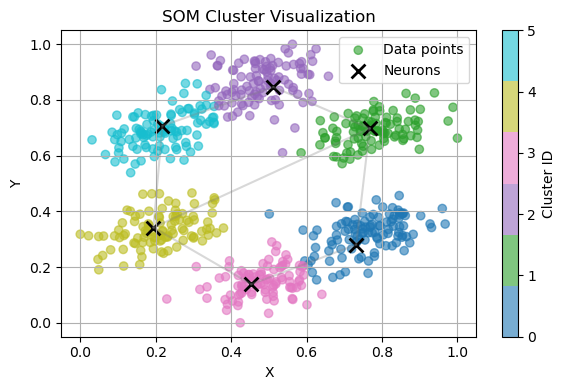

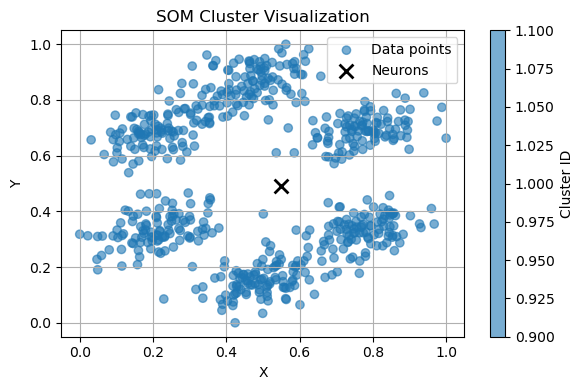

In [823]:
gaussian_som = next(item['som'] for item in neighbourhood_functions 
                   if item['neighbourhood_function'] == 'gaussian')
mexican_som = next(item['som'] for item in neighbourhood_functions 
                  if item['neighbourhood_function'] == 'mexican_hat')
gaussian_som.visualize_clusters(data_hex_xy)
mexican_som.visualize_clusters(data_hex_xy)

The instability observed when using the Mexican Hat neighbourhood function may stem from suboptimal parameter selection (particularly σₜ, s, and λ). A likely cause is an excessively large learning rate (s), which leads to overshooting: neurons near the BMU are pulled too aggressively toward input patterns, while those in the inhibitory surround are pushed away too forcefully.

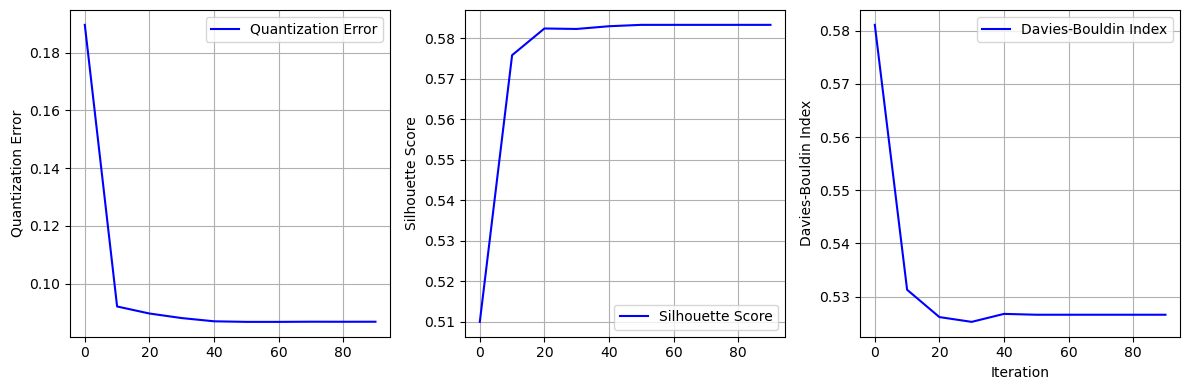

In [918]:
gaussian_lambda = KohonenNetwork(M=2, N=3, input_dim=2, neighbourhood_function='gaussian')
gaussian_lambda.fit(data_hex_xy, number_of_iterations=100, lambda_=10, sigma_t=1.0, s=1.0, plot_eval_metrics=True)

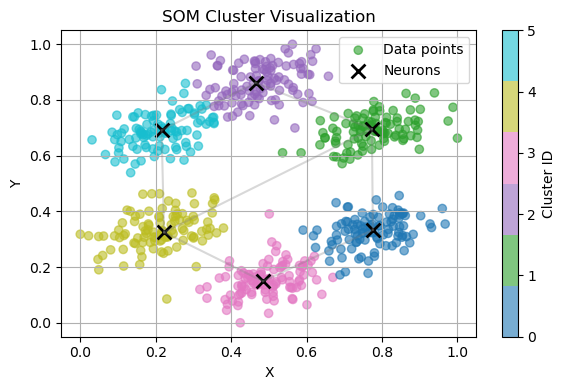

In [919]:
gaussian_lambda.visualize_clusters(data_hex_xy)

Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected
Only 1 cluster detected


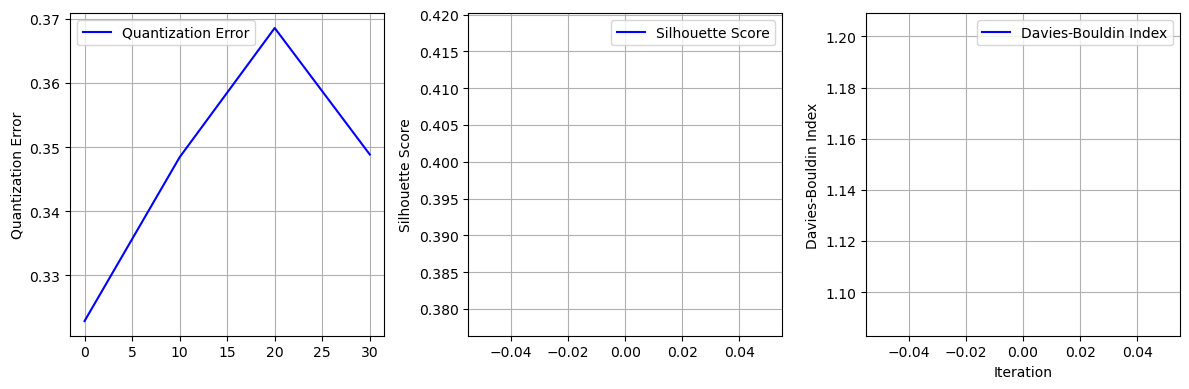

In [826]:
mexican_hat_lambda = KohonenNetwork(M=2, N=3, input_dim=2, neighbourhood_function='mexican_hat')
mexican_hat_lambda.fit(data_hex_xy, number_of_iterations=100, lambda_=10, sigma_t=1.0, s=1.0, plot_eval_metrics=True)

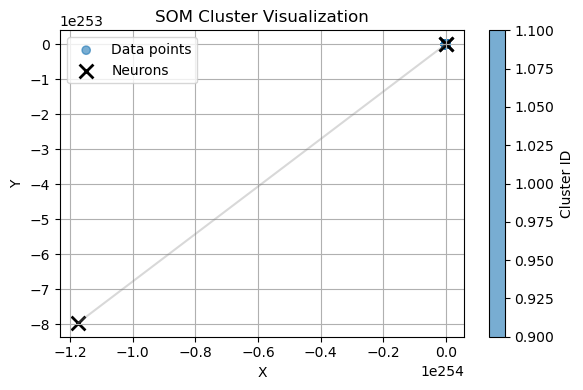

In [827]:
mexican_hat_lambda.visualize_clusters(data_hex_xy)

In [828]:
display(mexican_hat_lambda.calculate_clustering_metrics(data_hex_xy, true_labels=data_hez_c))

Only 1 cluster detected


Silhouette Score Davies-Bouldin Index  Quantization Error  Number of Clusters
0             None                 None                 NaN                   1

different s (scaling factor)

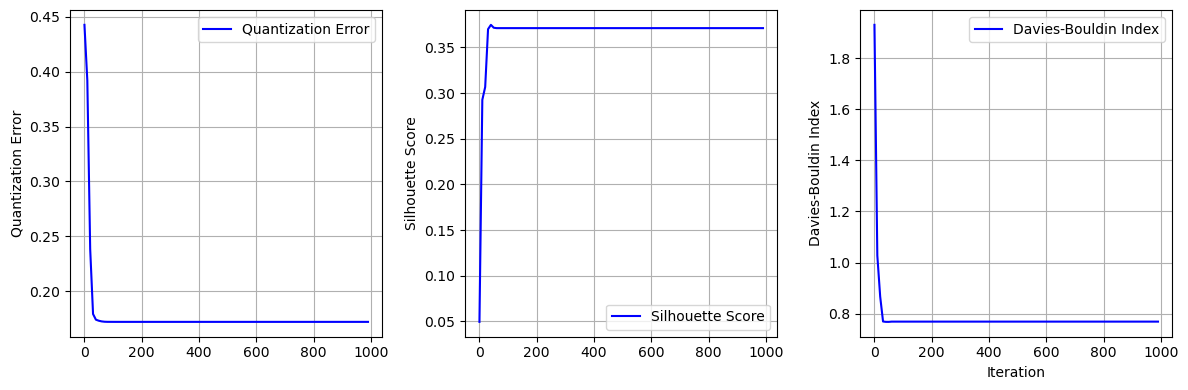

In [398]:
mexican_hat_parameters = KohonenNetwork(M=2, N=3, input_dim=2, neighbourhood_function='mexican_hat')
mexican_hat_parameters.fit(data_hex_xy, number_of_iterations=1000, lambda_=10, sigma_t=1.0, s=0.1, plot_eval_metrics=True)

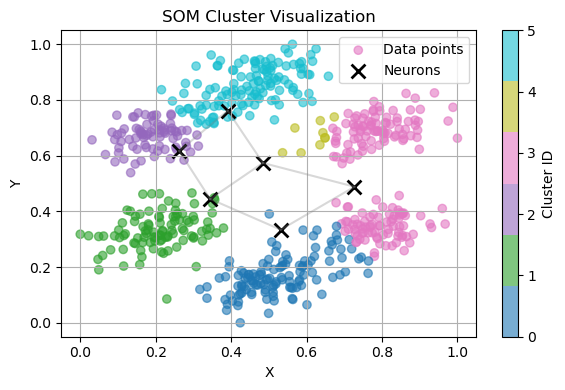

In [399]:
mexican_hat_parameters.visualize_clusters(data_hex_xy)

trying different s values for mexican hat

In [920]:
mh_s_values_experiments=try_different_s_values(data=data_hex_xy, M=2, N=3, input_dim=2, neighbourhood_function='mexican_hat',
                                        number_of_iterations=200, lambda_=10, sigma_t=1.0)

Fit with s value: 0.1
Only 1 cluster detected
Only 1 cluster detected
Fit with s value: 0.5
Only 1 cluster detected
Only 1 cluster detected
Fit with s value: 1.0
Only 1 cluster detected
Only 1 cluster detected
Fit with s value: 2.0
Fit with s value: 5.0
Fit with s value: 10


In [921]:
results_df = pd.DataFrame(mh_s_values_experiments)
display_cols = ['s','quantization_error', 'silhouette_score', 'davies_bouldin_index', 'num_clusters' ]
print(results_df[display_cols].round(4))

      s  quantization_error  silhouette_score  davies_bouldin_index  num_clusters
0   0.1              0.3487               NaN                   NaN             1
1   0.5              0.3487               NaN                   NaN             1
2   1.0                 NaN               NaN                   NaN             1
3   2.0              0.2434            0.4429                1.0176             2
4   5.0              0.0867            0.5832                0.5266             6
5  10.0              0.0867            0.5832                0.5266             6


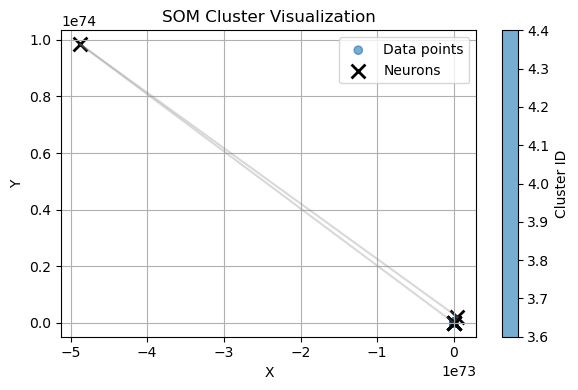

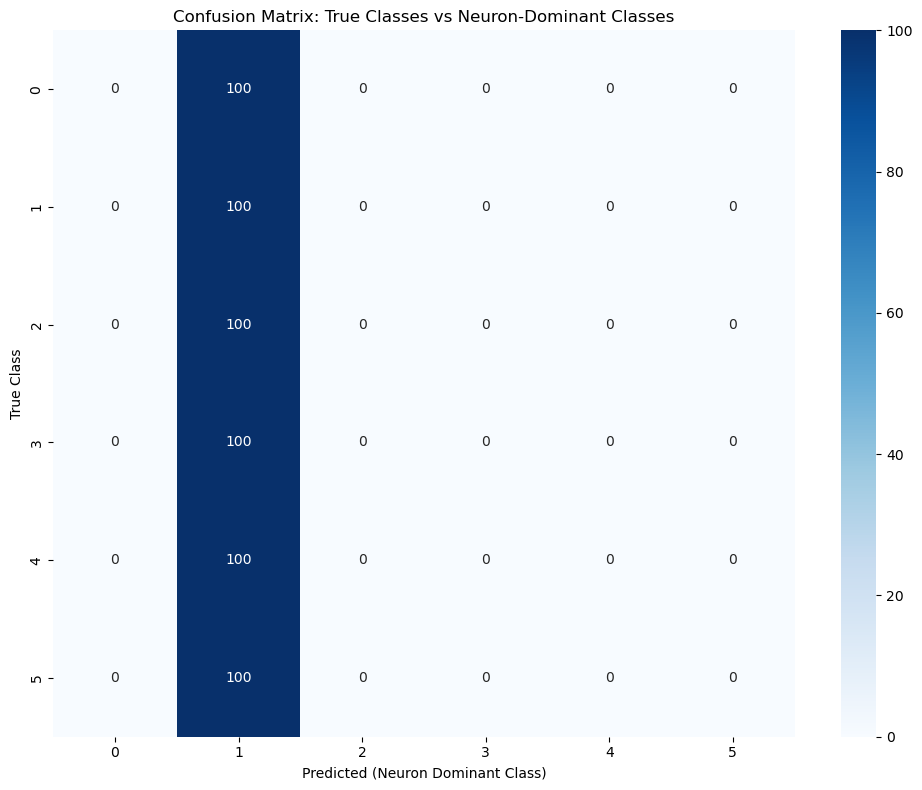

In [922]:
som_s_01 = next(item['som'] for item in mh_s_values_experiments if item['s'] == 0.1)
som_s_01.visualize_clusters(data_hex_xy)
som_s_01.plot_confusion_matrix(data_hex_xy, data_hez_c)

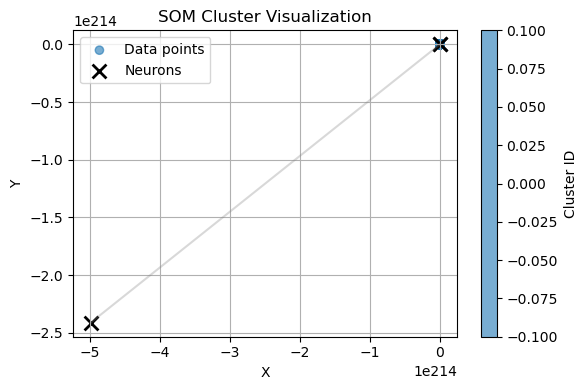

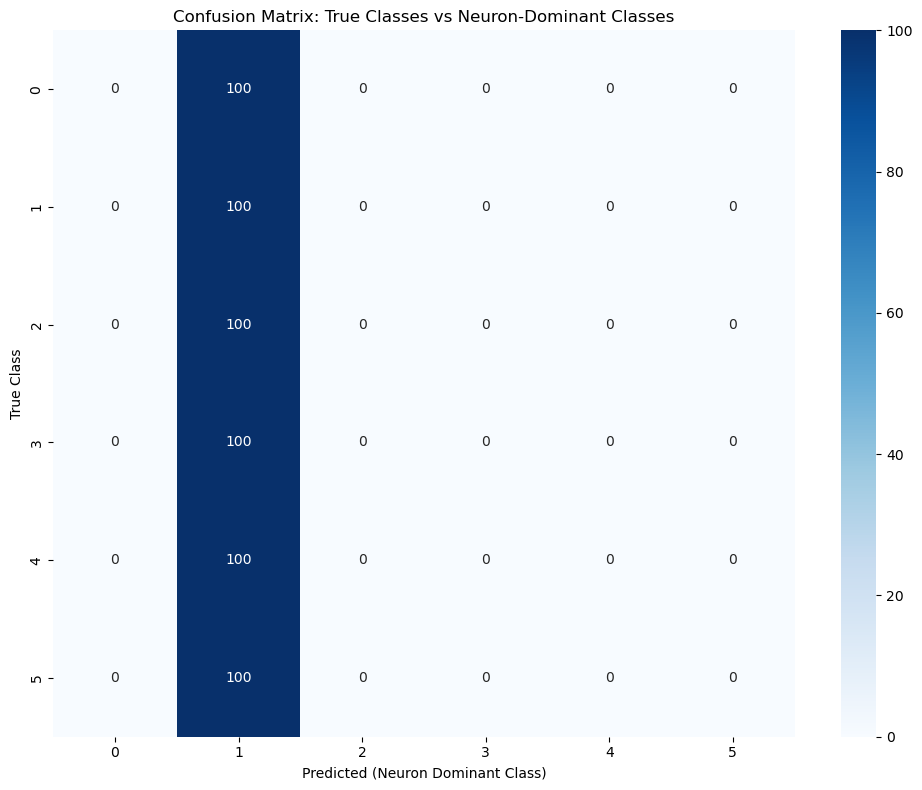

In [923]:
som_s_1 = next(item['som'] for item in mh_s_values_experiments if item['s'] == 1.0)
som_s_1.visualize_clusters(data_hex_xy)
som_s_1.plot_confusion_matrix(data_hex_xy, data_hez_c)

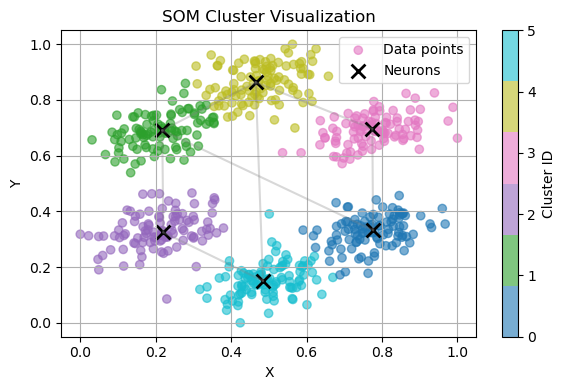

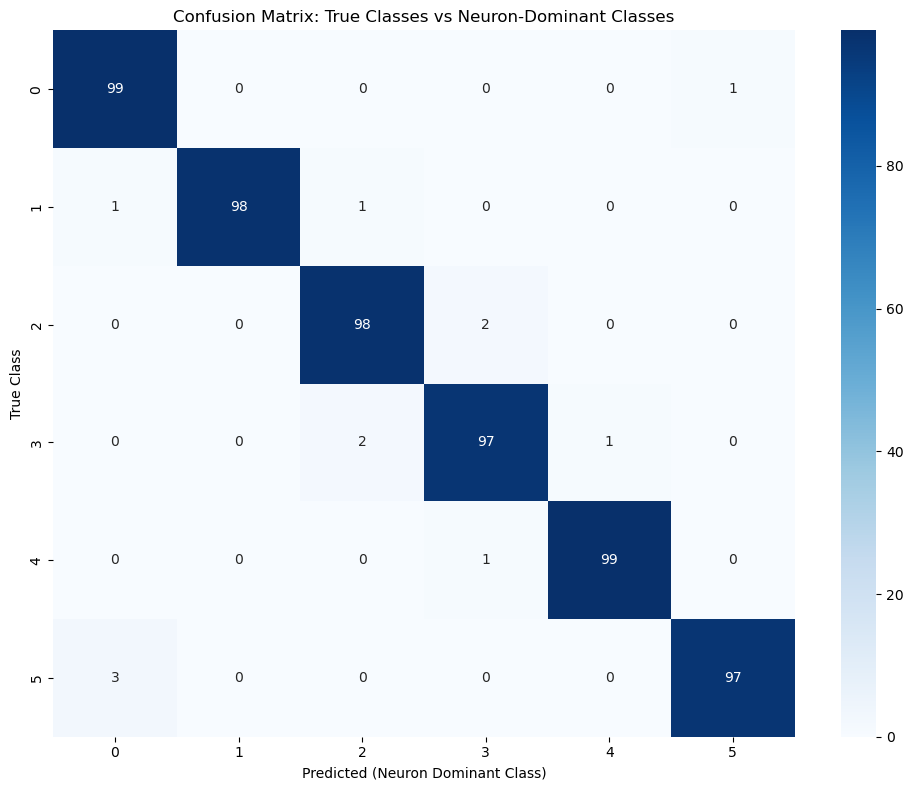

In [925]:
som_s_10 = next(item['som'] for item in mh_s_values_experiments if item['s'] == 10.0)
som_s_10.visualize_clusters(data_hex_xy)
som_s_10.plot_confusion_matrix(data_hex_xy, data_hez_c)

In [839]:
class_to_neurons, neuron_stats = som_s_10.get_neurons_defining_class(data_hex_xy, data_hez_c)
print_neuron_mapping(class_to_neurons, neuron_stats)

                NEURON CLASS MAPPING REPORT                 
Neuron  Dominant Class Purity Associated Classes
 (1,2)               0  96.1%          [1, 0, 5]
 (1,1)               1 100.0%                [1]
 (1,0)               2  97.0%          [1, 2, 3]
 (0,0)               3  97.0%          [2, 4, 3]
 (0,1)               4  99.0%             [4, 3]
 (0,2)               5  99.0%             [0, 5]

              CLASS TO NEURON MAPPING SUMMARY               
------------------------------------------------------------
Class 1: 3 neurons → [(1, 0), (1, 1), (1, 2)]
Class 0: 2 neurons → [(0, 2), (1, 2)]
Class 2: 2 neurons → [(0, 0), (1, 0)]
Class 4: 2 neurons → [(0, 0), (0, 1)]
Class 3: 3 neurons → [(0, 0), (0, 1), (1, 0)]
Class 5: 2 neurons → [(0, 2), (1, 2)]


In [854]:
mh_s_values_experiments=try_different_s_values(data=data_hex_xy, M=10, N=2, input_dim=2, neighbourhood_function='mexican_hat',
                                        number_of_iterations=200, lambda_=10, sigma_t=1.0)

Fit with s value: 0.1
Only 1 cluster detected
Only 1 cluster detected
Fit with s value: 0.5
Fit with s value: 1.0
Fit with s value: 2.0
Fit with s value: 5.0
Fit with s value: 10


In [855]:
results_df = pd.DataFrame(mh_s_values_experiments)
display_cols = ['s','quantization_error', 'silhouette_score', 'davies_bouldin_index', 'num_clusters' ]
print(results_df[display_cols].round(4))

      s  quantization_error  silhouette_score  davies_bouldin_index  num_clusters
0   0.1              0.3486               NaN                   NaN             1
1   0.5              0.2434            0.4429                1.0176             2
2   1.0              0.2436            0.4429                1.0176             2
3   2.0              0.1448            0.4867                0.6541             4
4   5.0              0.0545            0.3374                0.9443            19
5  10.0              0.0530            0.3385                0.9023            20


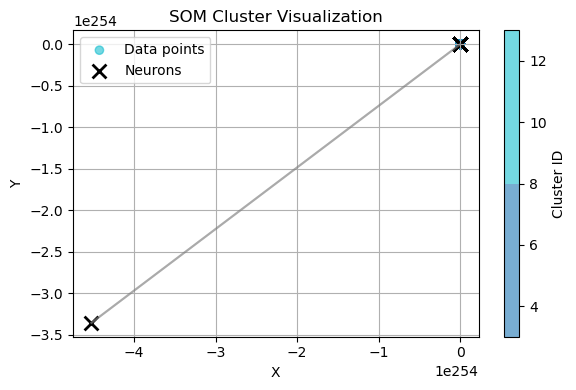

In [861]:
som_s_1 = next(item['som'] for item in mh_s_values_experiments if item['s'] == 1.0)
som_s_1.visualize_clusters(data_hex_xy)

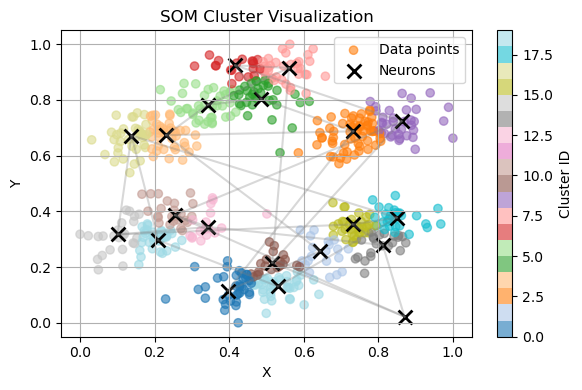

In [862]:
som_s_5 = next(item['som'] for item in mh_s_values_experiments if item['s'] == 5.0)
som_s_5.visualize_clusters(data_hex_xy)

In [863]:
class_to_neurons, neuron_stats = som_s_5.get_neurons_defining_class(data_hex_xy, data_hez_c)
print_neuron_mapping(class_to_neurons, neuron_stats)

                NEURON CLASS MAPPING REPORT                 
Neuron  Dominant Class Purity Associated Classes
 (2,0)             0.0  94.1%             [1, 0]
 (3,0)             0.0 100.0%                [0]
 (3,1)             0.0 100.0%                [0]
 (1,0)             1.0 100.0%                [1]
 (4,0)             1.0 100.0%                [1]
 (8,1)             2.0  96.7%             [1, 2]
 (0,1)             2.0  61.9%             [2, 3]
 (6,1)             2.0 100.0%                [2]
 (7,1)             2.0 100.0%                [2]
 (0,0)             3.0  97.3%             [4, 3]
 (9,1)             3.0  97.2%             [2, 3]
 (4,1)             3.0 100.0%                [3]
 (5,0)             4.0 100.0%                [4]
 (6,0)             4.0 100.0%                [4]
 (7,0)             4.0 100.0%                [4]
 (9,0)             4.0 100.0%                [4]
 (2,1)             5.0  60.5%             [0, 5]
 (1,1)             5.0 100.0%                [5]
 (8,0)  

In [864]:
class_dist = som_s_5.class_distribution_in_neurons(data_hex_xy, data_hez_c)
print_class_distribution(class_dist)

                         CLASS DISTRIBUTION IN NEURONS                          
Neuron  Total Samples    Class Distribution   
(0,0)        37         3:36(97.3%), 4:1(2.7%)
(0,1)        21        2:13(61.9%), 3:8(38.1%)
(1,0)        61                   1:61(100.0%)
(1,1)        41                   5:41(100.0%)
(2,0)        34         0:32(94.1%), 1:2(5.9%)
(2,1)        38       0:15(39.5%), 5:23(60.5%)
(3,0)        19                   0:19(100.0%)
(3,1)        34                   0:34(100.0%)
(4,0)        36                   1:36(100.0%)
(4,1)        21                   3:21(100.0%)
(5,0)        25                   4:25(100.0%)
(5,1)         0                          Empty
(6,0)        17                   4:17(100.0%)
(6,1)        22                   2:22(100.0%)
(7,0)        24                   4:24(100.0%)
(7,1)        35                   2:35(100.0%)
(8,0)        36                   5:36(100.0%)
(8,1)        30         1:1(3.3%), 2:29(96.7%)
(9,0)        33           

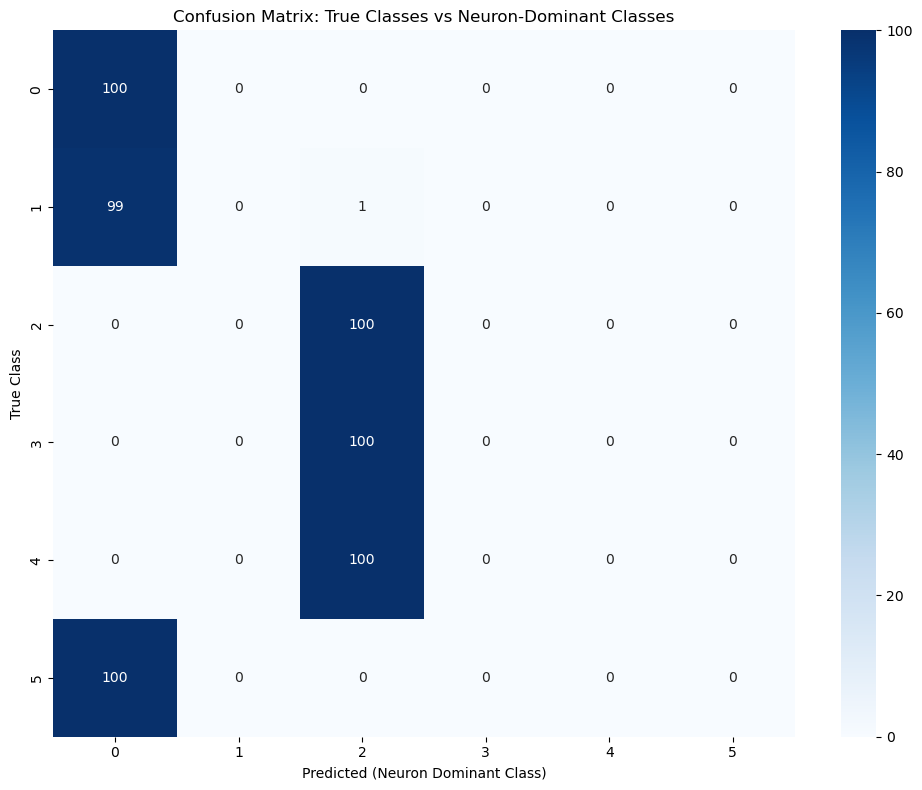

In [868]:
som_s_1.plot_confusion_matrix(data=data_hex_xy, true_labels=data_hez_c)

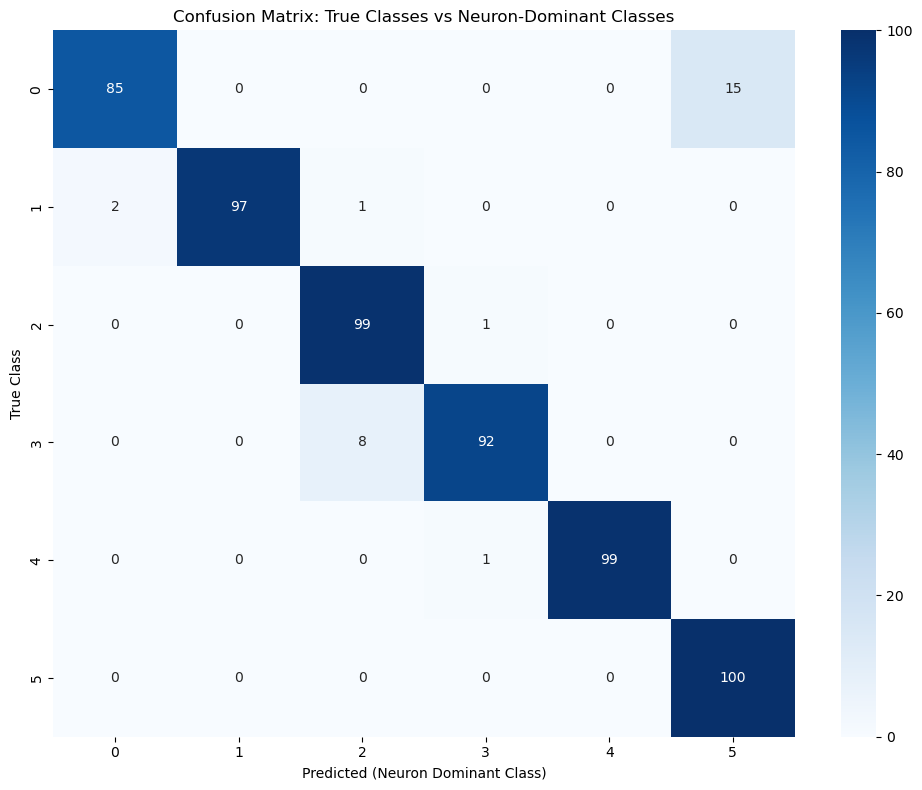

In [865]:
som_s_5.plot_confusion_matrix(data=data_hex_xy, true_labels=data_hez_c)

trying different sigma_t values

In [869]:
sigma_values=[0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
mh_sigma_values_experiments=try_different_sigma_values(data=data_hex_xy, M=2, N=3, input_dim=2, neighbourhood_function='mexican_hat',
                                        number_of_iterations=200, lambda_=10, s=1.0, sigma_t_values=sigma_values, plot_eval_metrics=False)

Fit with sigma value: 0.1
Fit with sigma value: 0.5
Fit with sigma value: 1.0
Only 1 cluster detected
Only 1 cluster detected
Fit with sigma value: 2.0
Only 1 cluster detected
Only 1 cluster detected
Fit with sigma value: 5.0
Only 1 cluster detected
Only 1 cluster detected
Fit with sigma value: 10.0
Only 1 cluster detected
Only 1 cluster detected


In [870]:
results_df = pd.DataFrame(mh_sigma_values_experiments)
display_cols = ['sigma','quantization_error', 'silhouette_score', 'davies_bouldin_index', 'num_clusters' ]
print(results_df[display_cols].round(4))

   sigma  quantization_error  silhouette_score  davies_bouldin_index  num_clusters
0    0.1              0.0867            0.5832                0.5266             6
1    0.5              0.2436            0.4429                1.0176             2
2    1.0                 NaN               NaN                   NaN             1
3    2.0                 NaN               NaN                   NaN             1
4    5.0              0.3488               NaN                   NaN             1
5   10.0              0.3487               NaN                   NaN             1


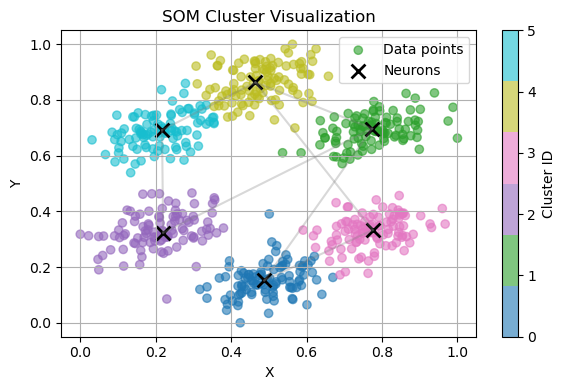

In [871]:
som_sigma_01 = next(item['som'] for item in mh_sigma_values_experiments if item['sigma'] == 0.1)
som_sigma_01.visualize_clusters(data_hex_xy)

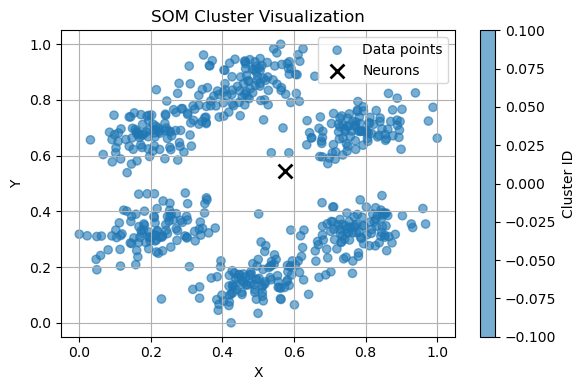

In [872]:
som_sigma_1 = next(item['som'] for item in mh_sigma_values_experiments if item['sigma'] == 1.0)
som_sigma_1.visualize_clusters(data_hex_xy)

s from previous experiment ~ 5, sigma 0.1

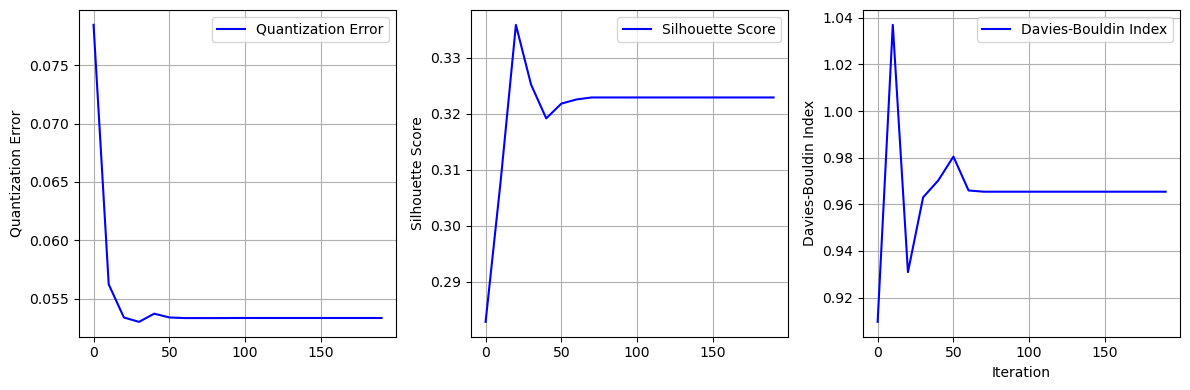

In [874]:
test = KohonenNetwork(M=10, N=2, input_dim=2, neighbourhood_function='mexican_hat')
test.fit(data_hex_xy, number_of_iterations=200, lambda_=10, sigma_t=0.1, s=5.0, plot_eval_metrics=True, 
         eval_every=10, verbose=True)

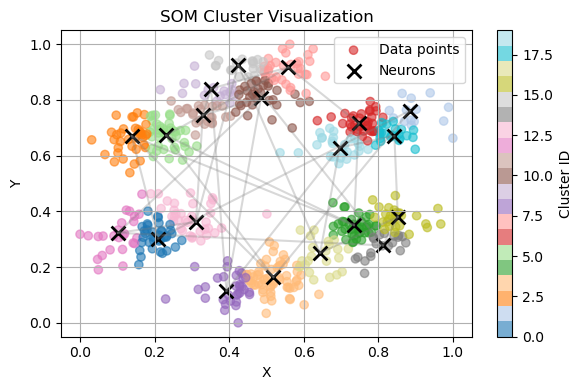

In [875]:
test.visualize_clusters(data_hex_xy)

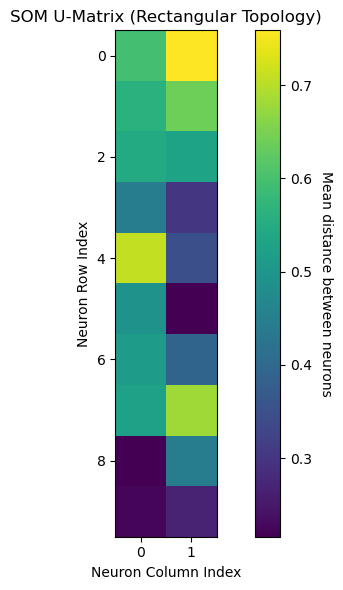

In [876]:
test.plot_umatrix()

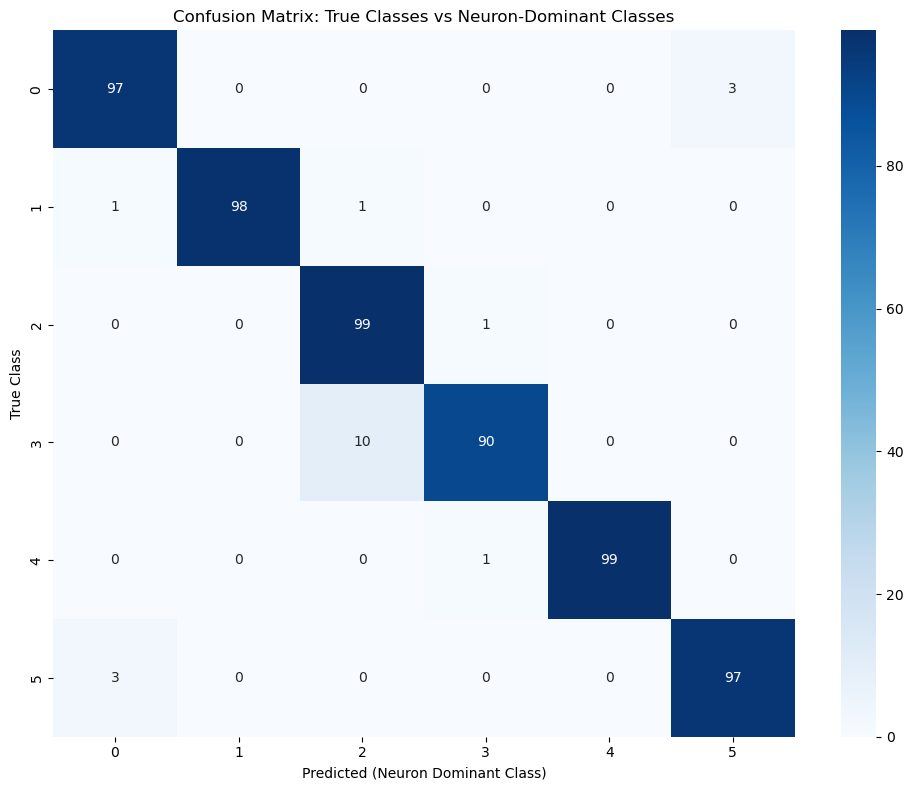

In [877]:
test.plot_confusion_matrix(data_hex_xy, data_hez_c)

larger grid

In [878]:
sigma_values=[0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
mh_sigma_values_experiments=try_different_sigma_values(data=data_hex_xy, M=10, N=10, input_dim=2, neighbourhood_function='mexican_hat',
                                number_of_iterations=200, lambda_=10, s=5.0, sigma_t_values=sigma_values, plot_eval_metrics=False)

Fit with sigma value: 0.1
Fit with sigma value: 0.5
Fit with sigma value: 1.0
Fit with sigma value: 2.0
Fit with sigma value: 5.0
Fit with sigma value: 10.0


In [879]:
results_df = pd.DataFrame(mh_sigma_values_experiments)
display_cols = ['sigma','quantization_error', 'silhouette_score', 'davies_bouldin_index', 'num_clusters']
print(results_df[display_cols].round(4))

   sigma  quantization_error  silhouette_score  davies_bouldin_index  num_clusters
0    0.1              0.0266            0.3430                0.7242            76
1    0.5              0.0257            0.3576                0.7194            78
2    1.0              0.0251            0.3506                0.7234            82
3    2.0              0.0524            0.3314                0.9513            21
4    5.0              0.0867            0.5832                0.5266             6
5   10.0              0.1873            0.4790                0.7684             3


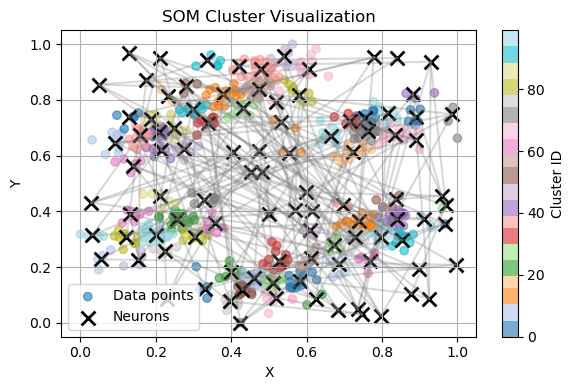

In [880]:
som_sigma_01 = next(item['som'] for item in mh_sigma_values_experiments if item['sigma'] == 0.1)
som_sigma_01.visualize_clusters(data_hex_xy)

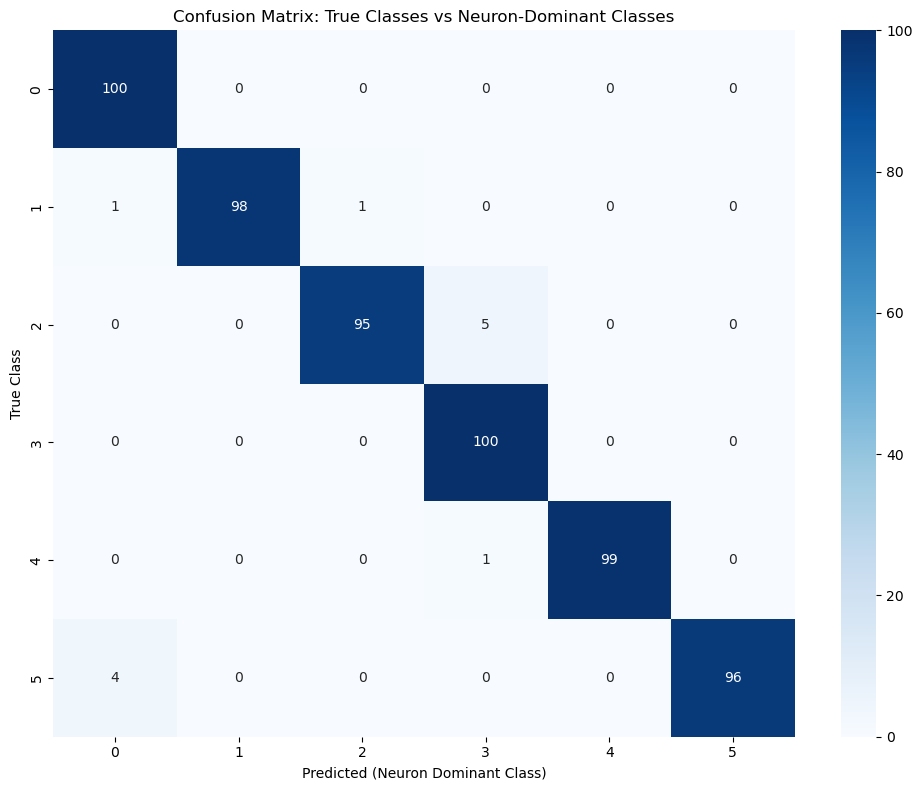

In [883]:
som_sigma_01.plot_confusion_matrix(data_hex_xy, data_hez_c)

The optimal neighborhood radius (σ) should scale with the grid dimensions: smaller grids require reduced σ values to maintain precise local adaptation, while larger grids benefit from increased σ to enable effective global organization.

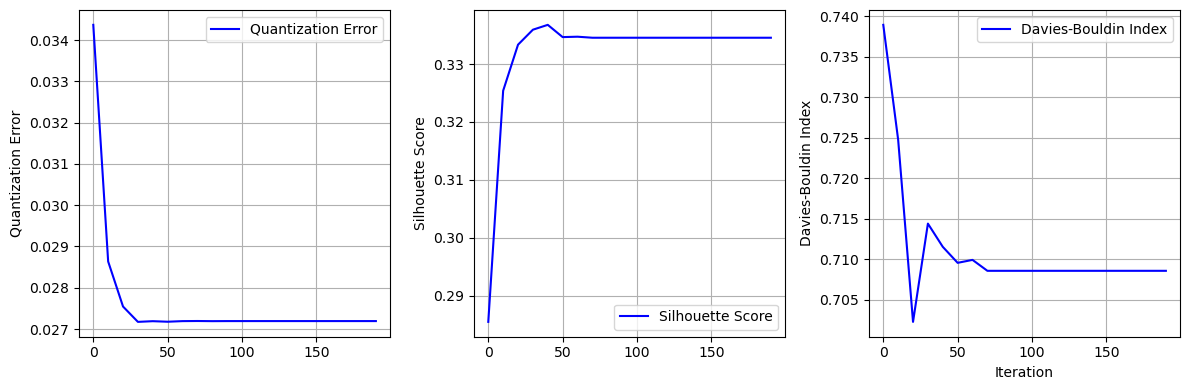

In [884]:
net_2d = KohonenNetwork(M=10, N=10, input_dim=2, neighbourhood_function='mexican_hat')
net_2d.fit(data_hex_xy, number_of_iterations=200, lambda_=10, sigma_t=0.1, s=5.0, 
           plot_eval_metrics=True, eval_every=10, verbose=True)

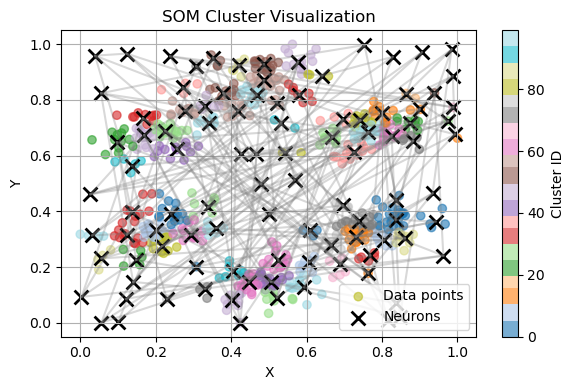

In [885]:
net_2d.visualize_clusters(data_hex_xy)

In [886]:
display(net_2d.calculate_clustering_metrics(data_hex_xy, true_labels=data_hez_c))

Silhouette Score  Davies-Bouldin Index  Quantization Error  Number of Clusters
0              0.33                  0.71                0.03                  76

In [887]:
class_dist = net_2d.class_distribution_in_neurons(data_hex_xy, data_hez_c)
print_class_distribution(class_dist)

                         CLASS DISTRIBUTION IN NEURONS                          
Neuron  Total Samples   Class Distribution  
(0,0)        15                 4:15(100.0%)
(0,1)         1                  4:1(100.0%)
(0,2)         5                  2:5(100.0%)
(0,3)        20                 2:20(100.0%)
(0,4)         4       1:1(25.0%), 2:3(75.0%)
(0,5)         3                  2:3(100.0%)
(0,6)         9       2:1(11.1%), 3:8(88.9%)
(0,7)         9                  2:9(100.0%)
(0,8)        17                 4:17(100.0%)
(0,9)         0                        Empty
(1,0)         0                        Empty
(1,1)         1                  1:1(100.0%)
(1,2)        14                 2:14(100.0%)
(1,3)         2                  1:2(100.0%)
(1,4)        10                 1:10(100.0%)
(1,5)         1                  2:1(100.0%)
(1,6)         0                        Empty
(1,7)         0                        Empty
(1,8)         2                  1:2(100.0%)
(1,9)         0    

In [888]:
class_to_neurons, neuron_stats= net_2d.get_neurons_defining_class(data_hex_xy, data_hez_c)
print_neuron_mapping(class_to_neurons, neuron_stats)

                NEURON CLASS MAPPING REPORT                 
Neuron  Dominant Class Purity Associated Classes
 (9,3)             0.0  50.0%             [1, 0]
 (3,1)             0.0 100.0%                [0]
 (4,5)             0.0 100.0%                [0]
 (5,0)             0.0 100.0%                [0]
 (5,1)             0.0 100.0%                [0]
 (5,4)             0.0 100.0%                [0]
 (5,5)             0.0 100.0%                [0]
 (5,6)             0.0 100.0%                [0]
 (5,8)             0.0 100.0%                [0]
 (7,1)             0.0 100.0%                [0]
 (7,9)             0.0 100.0%                [0]
 (8,5)             0.0 100.0%                [0]
 (9,5)             0.0 100.0%                [0]
 (1,1)             1.0 100.0%                [1]
 (1,3)             1.0 100.0%                [1]
 (1,4)             1.0 100.0%                [1]
 (1,8)             1.0 100.0%                [1]
 (2,1)             1.0 100.0%                [1]
 (2,7)  

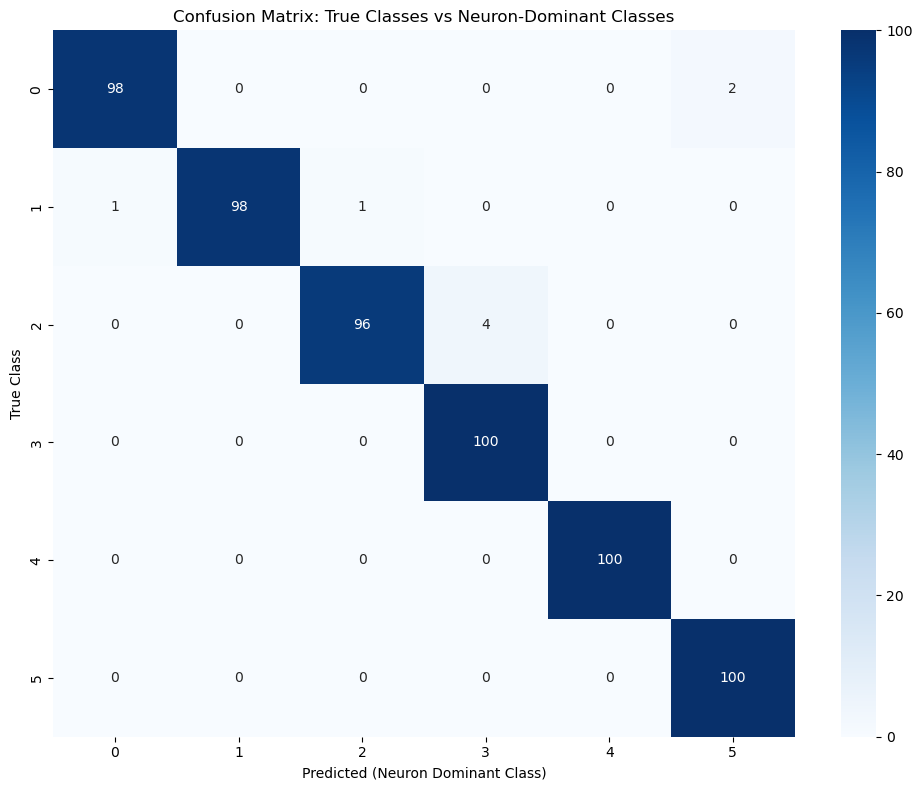

In [889]:
net_2d.plot_confusion_matrix(data_hex_xy, data_hez_c)

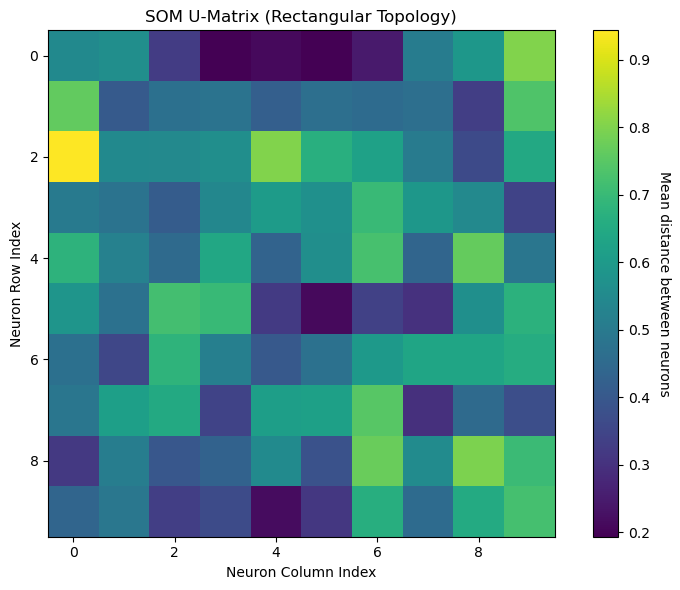

In [890]:
net_2d.plot_umatrix()

### Cube dataset

In [928]:
data_cube = pd.read_csv('./data/cube.csv')
data_cube_xyz=data_cube[['x', 'y', 'z']].to_numpy()
data_cube_c=data_cube[['c']].to_numpy()
print("2D data shape:", data_cube_xyz.shape)
scaler = MinMaxScaler()
data_cube_xyz = scaler.fit_transform(data_cube_xyz)
visualize_3d_data(data_cube_xyz)

2D data shape: (1200, 3)


#### trying different grids

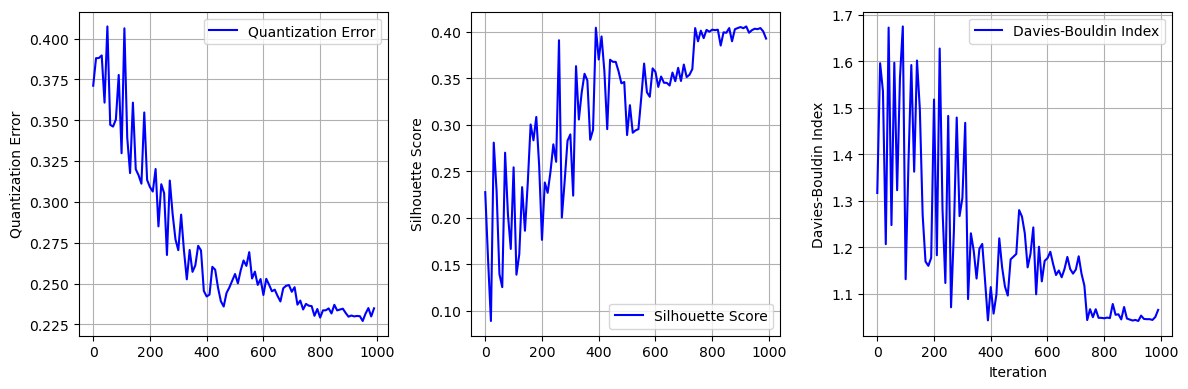

In [661]:
net_3d=KohonenNetwork(M=2, N=2, input_dim=3, neighbourhood_function='gaussian')
net_3d.fit(data_cube_xyz, number_of_iterations=1000, lambda_=500, sigma_t=1.0, s=1.0, plot_eval_metrics=True )

In [662]:
net_3d.visualize_clusters_3d(data_cube_xyz)

In [663]:
display(net_3d.calculate_clustering_metrics(data_cube_xyz, true_labels=data_cube_c))

Silhouette Score  Davies-Bouldin Index  Quantization Error  Number of Clusters
0              0.39                  1.07                0.23                   4

In [664]:
class_dist = net_3d.class_distribution_in_neurons(data_cube_xyz, data_cube_c)
print_class_distribution(class_dist)

                         CLASS DISTRIBUTION IN NEURONS                          
Neuron  Total Samples                      Class Distribution                     
(0,0)       286                              1:136(47.6%), 4:3(1.0%), 5:147(51.4%)
(0,1)       315       0:150(47.6%), 1:14(4.4%), 4:147(46.7%), 5:3(1.0%), 6:1(0.3%)
(1,0)       292                              2:150(51.4%), 3:7(2.4%), 6:135(46.2%)
(1,1)       307                             3:143(46.6%), 6:14(4.6%), 7:150(48.9%)


In [665]:
class_to_neurons, neuron_stats= net_3d.get_neurons_defining_class(data_cube_xyz, data_cube_c)
print_neuron_mapping(class_to_neurons, neuron_stats)

                NEURON CLASS MAPPING REPORT                 
Neuron  Dominant Class Purity Associated Classes
 (0,1)               0  47.6%    [0, 1, 4, 5, 6]
 (1,0)               2  51.4%          [2, 3, 6]
 (0,0)               5  51.4%          [1, 4, 5]
 (1,1)               7  48.9%          [3, 6, 7]

              CLASS TO NEURON MAPPING SUMMARY               
------------------------------------------------------------
Class 0: 1 neurons → [(0, 1)]
Class 1: 2 neurons → [(0, 0), (0, 1)]
Class 2: 1 neurons → [(1, 0)]
Class 3: 2 neurons → [(1, 0), (1, 1)]
Class 4: 2 neurons → [(0, 0), (0, 1)]
Class 5: 2 neurons → [(0, 0), (0, 1)]
Class 6: 3 neurons → [(0, 1), (1, 0), (1, 1)]
Class 7: 1 neurons → [(1, 1)]


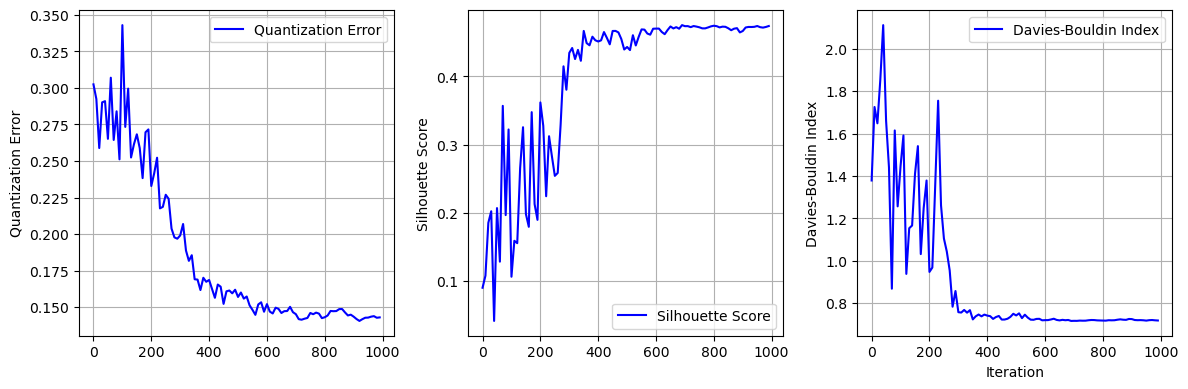

In [666]:
net_3d=KohonenNetwork(M=2, N=4, input_dim=3, neighbourhood_function='gaussian')
net_3d.fit(data_cube_xyz, number_of_iterations=1000, lambda_=500, sigma_t=1.0, s=1.0, plot_eval_metrics=True )

In [667]:
net_3d.visualize_clusters_3d(data_cube_xyz)

In [668]:
display(net_3d.calculate_clustering_metrics(data_cube_xyz, true_labels=data_cube_c))

Silhouette Score  Davies-Bouldin Index  Quantization Error  Number of Clusters
0              0.47                  0.72                0.14                   8

In [669]:
class_dist = net_3d.class_distribution_in_neurons(data_cube_xyz, data_cube_c)
print_class_distribution(class_dist)

                         CLASS DISTRIBUTION IN NEURONS                          
Neuron  Total Samples         Class Distribution        
(0,0)       146                  2:3(2.1%), 6:143(97.9%)
(0,1)       156                 3:12(7.7%), 7:144(92.3%)
(0,2)       154                  1:149(96.8%), 5:5(3.2%)
(0,3)       145                  0:143(98.6%), 4:2(1.4%)
(1,0)       155       2:147(94.8%), 3:1(0.6%), 6:7(4.5%)
(1,1)       143                  3:137(95.8%), 7:6(4.2%)
(1,2)       147       1:1(0.7%), 4:3(2.0%), 5:143(97.3%)
(1,3)       154       0:7(4.5%), 4:145(94.2%), 5:2(1.3%)


In [670]:
class_to_neurons, neuron_stats= net_3d.get_neurons_defining_class(data_cube_xyz, data_cube_c)
print_neuron_mapping(class_to_neurons, neuron_stats)

                NEURON CLASS MAPPING REPORT                 
Neuron  Dominant Class Purity Associated Classes
 (0,3)               0  98.6%             [0, 4]
 (0,2)               1  96.8%             [1, 5]
 (1,0)               2  94.8%          [2, 3, 6]
 (1,1)               3  95.8%             [3, 7]
 (1,3)               4  94.2%          [0, 4, 5]
 (1,2)               5  97.3%          [1, 4, 5]
 (0,0)               6  97.9%             [2, 6]
 (0,1)               7  92.3%             [3, 7]

              CLASS TO NEURON MAPPING SUMMARY               
------------------------------------------------------------
Class 0: 2 neurons → [(0, 3), (1, 3)]
Class 1: 2 neurons → [(0, 2), (1, 2)]
Class 2: 2 neurons → [(0, 0), (1, 0)]
Class 3: 3 neurons → [(0, 1), (1, 0), (1, 1)]
Class 4: 3 neurons → [(0, 3), (1, 2), (1, 3)]
Class 5: 3 neurons → [(0, 2), (1, 2), (1, 3)]
Class 6: 2 neurons → [(0, 0), (1, 0)]
Class 7: 2 neurons → [(0, 1), (1, 1)]


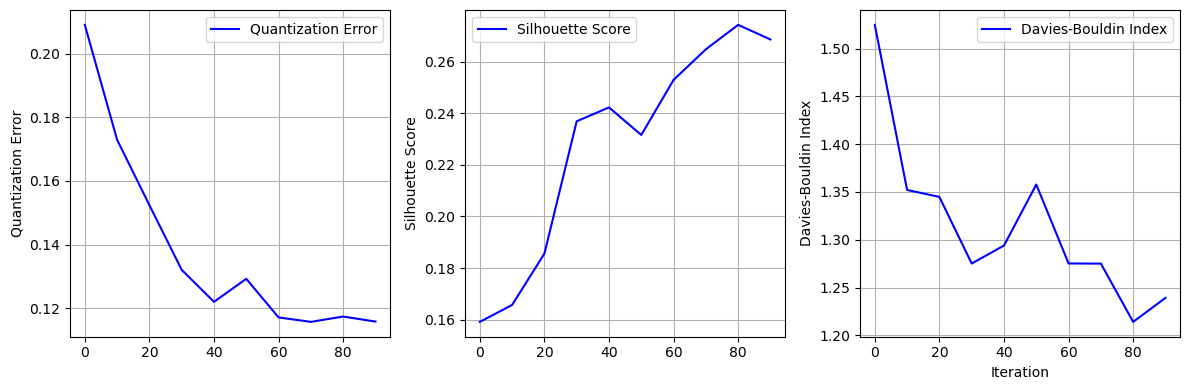

In [949]:
net_3d=KohonenNetwork(M=10, N=2, input_dim=3, neighbourhood_function='gaussian')
net_3d.fit(data_cube_xyz, number_of_iterations=100, lambda_=50, sigma_t=1.0, s=1.0, plot_eval_metrics=True )

In [950]:
net_3d.visualize_clusters_3d(data_cube_xyz)

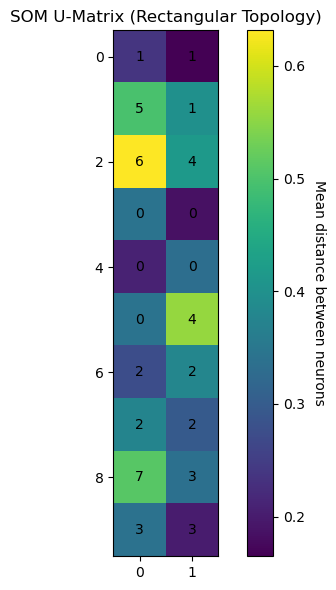

In [951]:
net_3d.plot_umatrix(data_cube_xyz, data_cube_c)

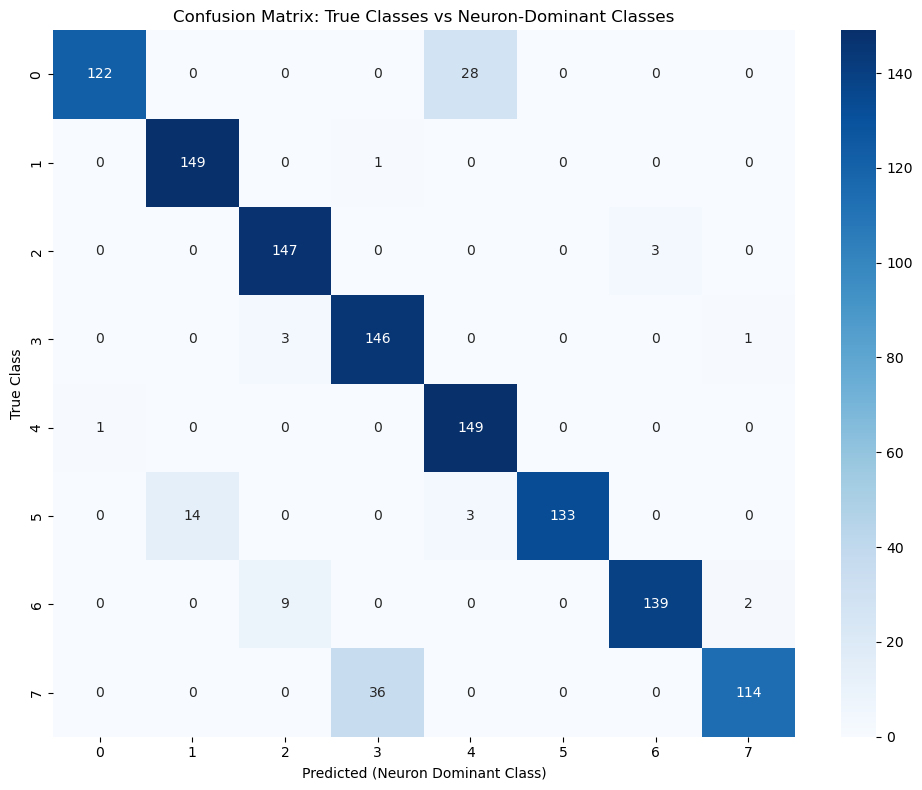

In [952]:
net_3d.plot_confusion_matrix(data_cube_xyz, data_cube_c)

In [953]:
display(net_3d.calculate_clustering_metrics(data_cube_xyz, true_labels=data_cube_c))

Silhouette Score  Davies-Bouldin Index  Quantization Error  Number of Clusters
0              0.29                  1.14                0.12                  20

In [954]:
class_dist = net_3d.class_distribution_in_neurons(data_cube_xyz, data_cube_c)
print_class_distribution(class_dist)

                         CLASS DISTRIBUTION IN NEURONS                          
Neuron  Total Samples          Class Distribution        
(0,0)        63                  1:50(79.4%), 5:13(20.6%)
(0,1)        41                    1:40(97.6%), 5:1(2.4%)
(1,0)       133                             5:133(100.0%)
(1,1)        59                              1:59(100.0%)
(2,0)       142                   2:3(2.1%), 6:139(97.9%)
(2,1)        62       0:26(41.9%), 4:35(56.5%), 5:1(1.6%)
(3,0)        30                              0:30(100.0%)
(3,1)        24                    0:23(95.8%), 4:1(4.2%)
(4,0)        19                              0:19(100.0%)
(4,1)        17                              0:17(100.0%)
(5,0)        33                              0:33(100.0%)
(5,1)       118        0:2(1.7%), 4:114(96.6%), 5:2(1.7%)
(6,0)        34         2:30(88.2%), 3:1(2.9%), 6:3(8.8%)
(6,1)        22                    2:20(90.9%), 3:2(9.1%)
(7,0)        54                              2:54

In [955]:
class_to_neurons, neuron_stats= net_3d.get_neurons_defining_class(data_cube_xyz, data_cube_c)
print_neuron_mapping(class_to_neurons, neuron_stats)

                NEURON CLASS MAPPING REPORT                 
Neuron  Dominant Class Purity Associated Classes
 (3,1)               0  95.8%             [0, 4]
 (3,0)               0 100.0%                [0]
 (4,0)               0 100.0%                [0]
 (4,1)               0 100.0%                [0]
 (5,0)               0 100.0%                [0]
 (0,1)               1  97.6%             [1, 5]
 (0,0)               1  79.4%             [1, 5]
 (1,1)               1 100.0%                [1]
 (6,1)               2  90.9%             [2, 3]
 (6,0)               2  88.2%          [2, 3, 6]
 (7,1)               2  87.8%             [2, 6]
 (7,0)               2 100.0%                [2]
 (9,1)               3  97.9%             [1, 3]
 (8,1)               3  61.3%             [3, 7]
 (9,0)               3 100.0%                [3]
 (5,1)               4  96.6%          [0, 4, 5]
 (2,1)               4  56.5%          [0, 4, 5]
 (1,0)               5 100.0%                [5]
 (2,0)  

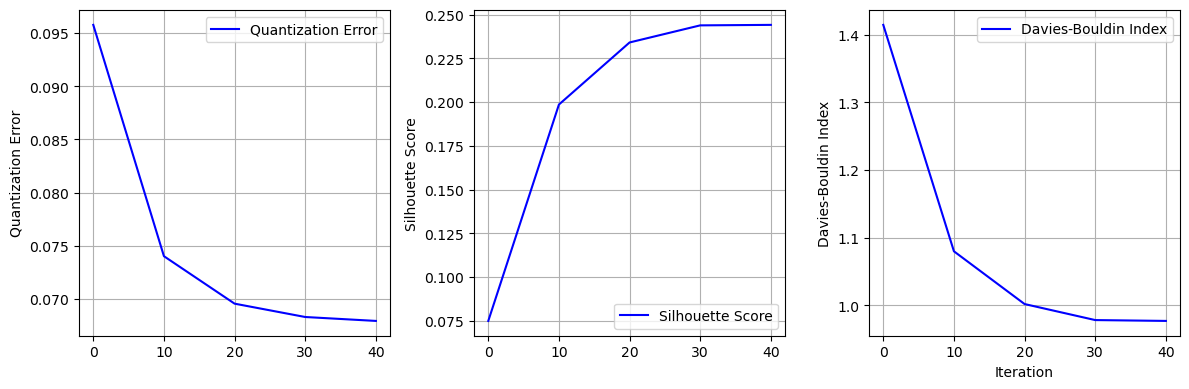

In [935]:
net_3d_larger_grid=KohonenNetwork(M=10, N=10, input_dim=3, neighbourhood_function='gaussian')
net_3d_larger_grid.fit(data_cube_xyz, number_of_iterations=50, lambda_=10, sigma_t=1.0, s=1.0, plot_eval_metrics=True, verbose=True, eval_every=10)

In [936]:
net_3d_larger_grid.visualize_clusters_3d(data_cube_xyz)

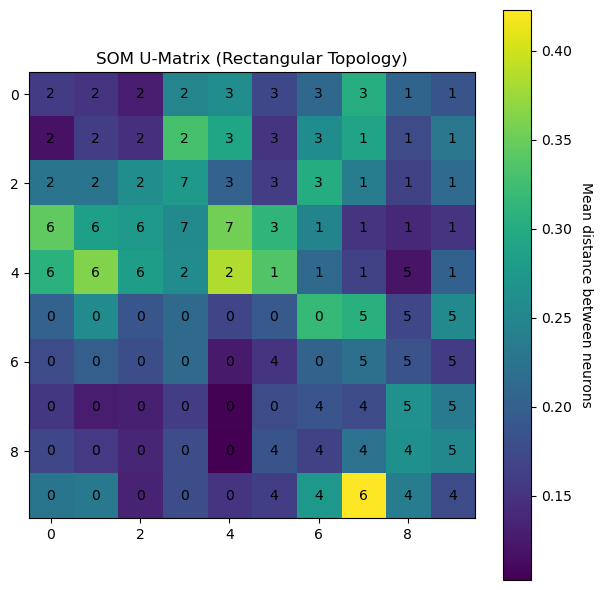

In [937]:
net_3d_larger_grid.plot_umatrix(data_cube_xyz, data_cube_c)

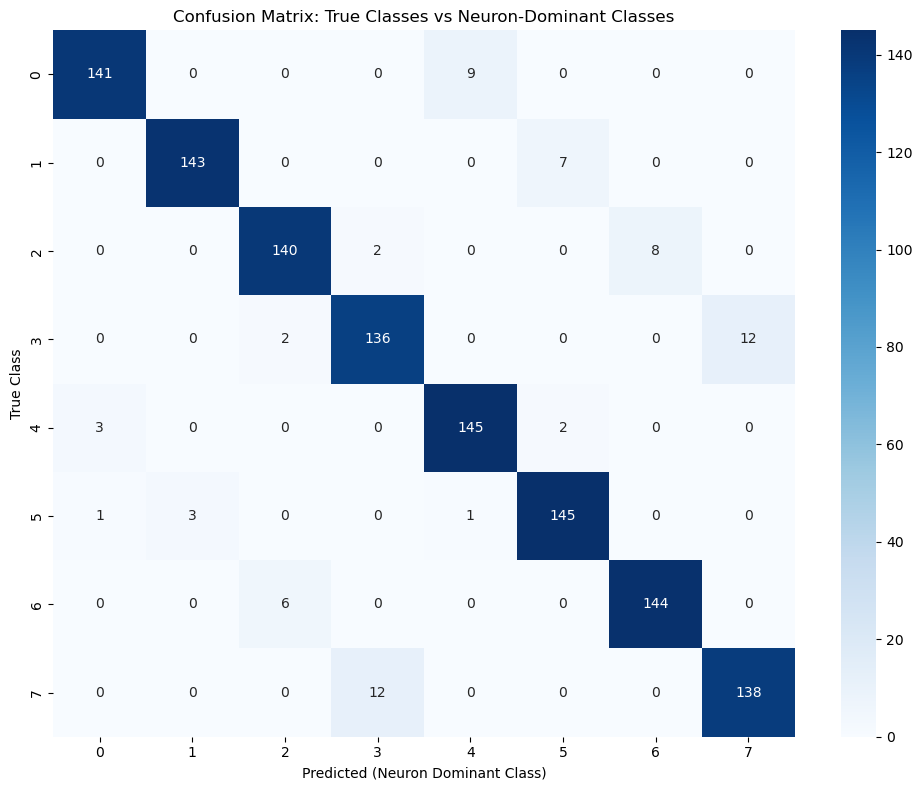

In [938]:
net_3d_larger_grid.plot_confusion_matrix(data_cube_xyz, data_cube_c)

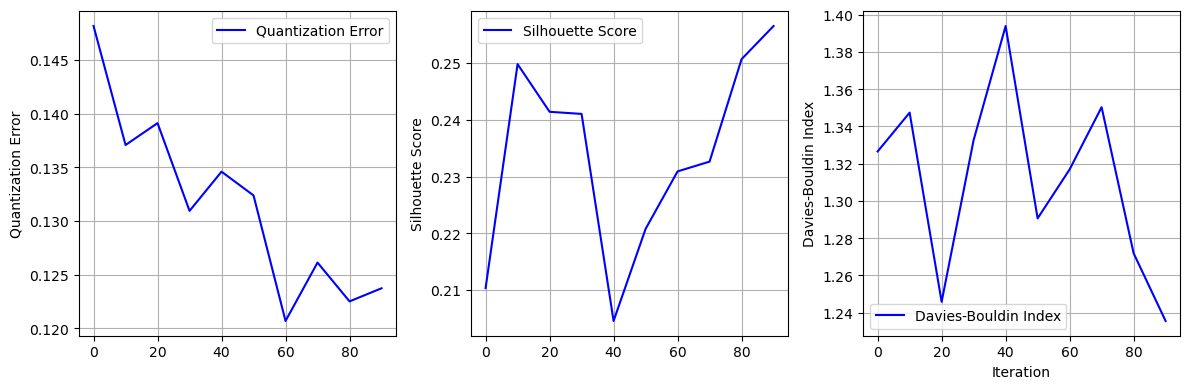

In [943]:
net_3d_mh=KohonenNetwork(M=10, N=2, input_dim=3, neighbourhood_function='mexican_hat')
net_3d_mh.fit(data_cube_xyz, number_of_iterations=100, lambda_=100, sigma_t=1.0, s=10.0, plot_eval_metrics=True )

In [944]:
net_3d_mh.visualize_clusters_3d(data_cube_xyz)

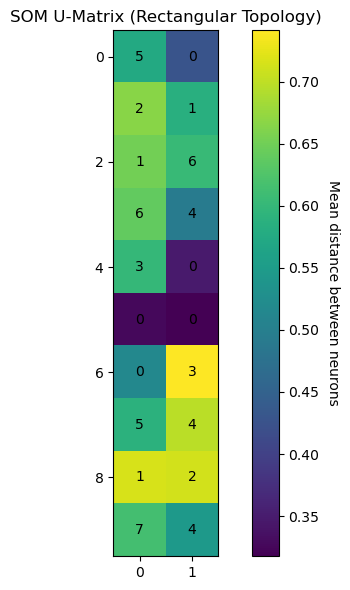

In [946]:
net_3d_mh.plot_umatrix(data_cube_xyz, data_cube_c)

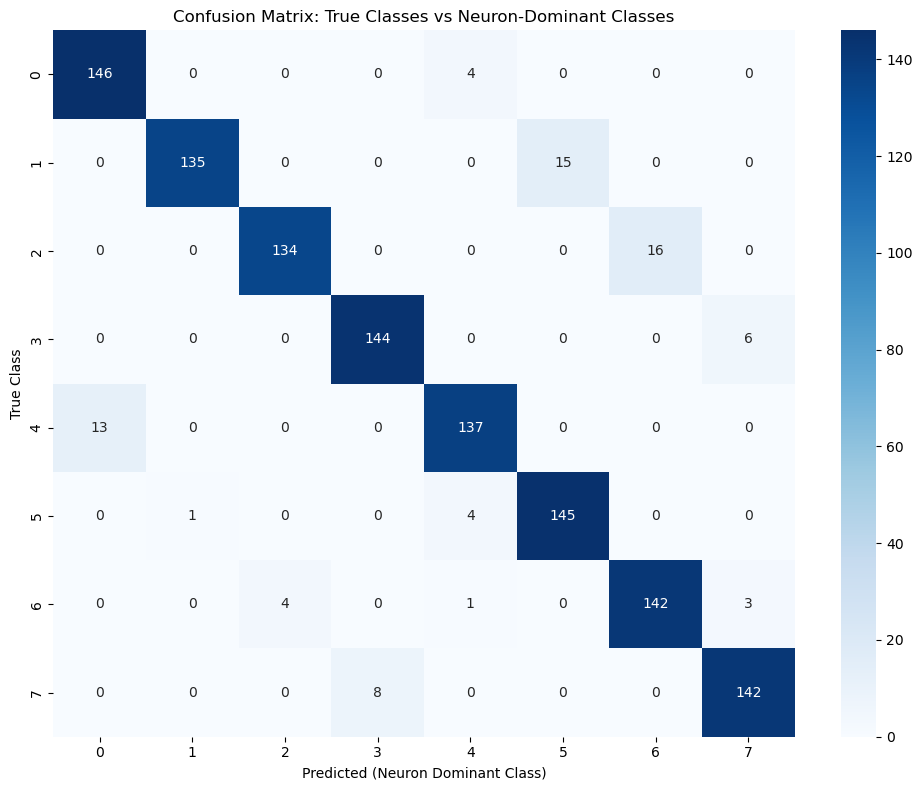

In [945]:
net_3d_mh.plot_confusion_matrix(data_cube_xyz, data_cube_c)

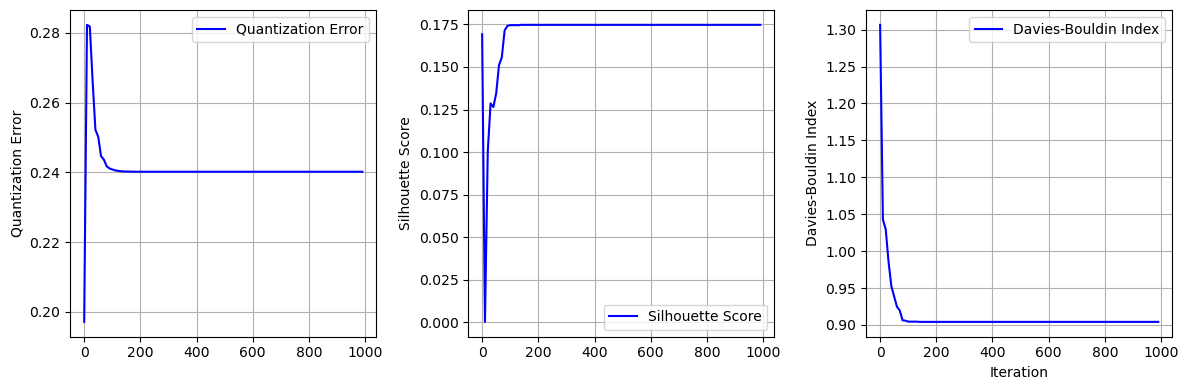

In [689]:
net_3d=KohonenNetwork(M=10, N=2, input_dim=3, neighbourhood_function='mexican_hat')
net_3d.fit(data_cube_xyz, number_of_iterations=1000, lambda_=20, sigma_t=1.0, s=1.0, plot_eval_metrics=True )

In [690]:
net_3d.visualize_clusters_3d(data_cube_xyz)

In [691]:
display(net_3d.calculate_clustering_metrics(data_cube_xyz, true_labels=data_cube_c))

Silhouette Score  Davies-Bouldin Index  Quantization Error  Number of Clusters
0              0.17                   0.9                0.24                   9

In [692]:
class_dist = net_3d.class_distribution_in_neurons(data_cube_xyz, data_cube_c)
print_class_distribution(class_dist)

                         CLASS DISTRIBUTION IN NEURONS                          
Neuron  Total Samples                      Class Distribution                     
(0,0)         0                                                              Empty
(0,1)        98                                           5:87(88.8%), 7:11(11.2%)
(1,0)        96                                             2:88(91.7%), 6:8(8.3%)
(1,1)       200                                          1:150(75.0%), 5:50(25.0%)
(2,0)         0                                                              Empty
(2,1)         2                                                        6:2(100.0%)
(3,0)         0                                                              Empty
(3,1)         0                                                              Empty
(4,0)       282                  2:18(6.4%), 3:150(53.2%), 6:8(2.8%), 7:106(37.6%)
(4,1)         0                                                              Empty
(5,0) 

In [693]:
class_to_neurons, neuron_stats= net_3d.get_neurons_defining_class(data_cube_xyz, data_cube_c)
print_neuron_mapping(class_to_neurons, neuron_stats)

                NEURON CLASS MAPPING REPORT                 
Neuron  Dominant Class Purity Associated Classes
 (9,1)             0.0  72.2%    [0, 2, 4, 5, 6]
 (1,1)             1.0  75.0%             [1, 5]
 (1,0)             2.0  91.7%             [2, 6]
 (4,0)             3.0  53.2%       [2, 3, 6, 7]
 (7,1)             4.0  47.6%    [0, 2, 4, 5, 6]
 (5,0)             4.0 100.0%                [4]
 (0,1)             5.0  88.8%             [5, 7]
 (2,1)             6.0 100.0%                [6]
 (7,0)             7.0  76.7%             [6, 7]
 (0,0)             NaN   0.0%                 []
 (2,0)             NaN   0.0%                 []
 (3,0)             NaN   0.0%                 []
 (3,1)             NaN   0.0%                 []
 (4,1)             NaN   0.0%                 []
 (5,1)             NaN   0.0%                 []
 (6,0)             NaN   0.0%                 []
 (6,1)             NaN   0.0%                 []
 (8,0)             NaN   0.0%                 []
 (8,1)  